In [712]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Русский текст

In [713]:
sorts_count = 13

In [714]:
folder_path = "./sorts_tables/"

small_time_table_output_file = "./таблицы результатов/small_time_table.csv"
big_time_table_output_file = "./таблицы результатов/big_time_table.csv"

small_operations_table_output_file = "./таблицы результатов/small_operations_table.csv"
big_operations_table_output_file = "./таблицы результатов/big_operations_table.csv"

In [715]:
small_time_table = pd.DataFrame()
big_time_table = pd.DataFrame()

small_operations_table = pd.DataFrame()
big_operations_table = pd.DataFrame()

In [716]:
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path, sep=';', index_col=0)

    if file_name.endswith('_time_small.csv'):
        small_time_table = pd.concat([small_time_table, df])

    if file_name.endswith('_time_big.csv'):
        big_time_table = pd.concat([big_time_table, df])

    if file_name.endswith('_operations_small.csv'):
        small_operations_table = pd.concat([small_operations_table, df])

    if file_name.endswith('_operations_big.csv'):
        big_operations_table = pd.concat([big_operations_table, df])    
    
small_time_table.to_csv(small_time_table_output_file, sep=';')
big_time_table.to_csv(big_time_table_output_file, sep=';')

small_operations_table.to_csv(small_operations_table_output_file, sep=';')
big_operations_table.to_csv(big_operations_table_output_file, sep=';')

In [717]:
sorts_indexes = {"BinaryInsertionSort": 0, "BubbleSort": 1, "CountingSort": 2, "FirstIverson": 3,
            "HeapSort": 4, "InsertionSort": 5, "MergeSort": 6, "QuickSort": 7, "RadixSort": 8,
            "SecondIverson": 9, "SelectionSort": 10, "ShellSort": 11,
            "ShellSortCiura": 12}

In [718]:
def get_first_part_of_index_name_by_row(df, row_number):
    index_name = df.index[row_number]
    first_part_of_name = index_name.split()[0]
    return first_part_of_name

In [719]:
def print_time_plot_300_size(sort):
    fig, axes = plt.subplots(nrows=1, ncols=2)

    i = sorts_indexes[sort]

    df1 = small_time_table.iloc[i*8:i*8+4, :].T
    df1.ewm(alpha=0.3).mean().plot(ax=axes[0])

    df2 = small_time_table.iloc[i*8+4:i*8+8, :].T
    df2.ewm(alpha=0.3).mean().plot(ax=axes[1], legend=False)

    axes[0].set_title('Значения 0-5')
    axes[0].set_xlabel('Количество элементов')
    axes[0].set_ylabel('Время, нс')

    axes[1].set_title('Значения 0-4000')
    axes[1].set_xlabel('Количество элементов')
    axes[1].set_ylabel('Время, нс')

    
    axes[0].set_position([0, 0, 0.8, 0.85])
    axes[1].set_position([1, 0, 0.8, 0.85])

    axes[0].legend(['Случайный массив', 'Отсортированный массив', 'Почти отсортированный массив', 'Обратно отсортированный массив'],
        loc=(0.5, 1.1), ncol=2)

    fig.suptitle(sort + ' на массиве размера 300', x=0.8, y=1.12)

    plt.show()

def print_time_plot_4100_size(sort):
    fig, axes = plt.subplots(nrows=1, ncols=2)

    i = sorts_indexes[sort]

    df1 = big_time_table.iloc[i*8:i*8+4, :].T
    df1.ewm(alpha=0.3).mean().plot(ax=axes[0])

    df2 = big_time_table.iloc[i*8+4:i*8+8, :].T
    df2.ewm(alpha=0.3).mean().plot(ax=axes[1], legend=False)

    axes[0].set_title('Значения 0-5')
    axes[0].set_xlabel('Количество элементов')
    axes[0].set_ylabel('Время, нс')

    axes[1].set_title('Значения 0-4000')
    axes[1].set_xlabel('Количество элементов')
    axes[1].set_ylabel('Время, нс')

    
    axes[0].set_position([0, 0, 0.8, 0.85])
    axes[1].set_position([1, 0, 0.8, 0.85])

    axes[0].legend(['Случайный массив', 'Отсортированный массив', 'Почти отсортированный массив', 'Обратно отсортированный массив'],
        loc=(0.5, 1.1), ncol=2)

    fig.suptitle(sort + ' на массиве размера 4100', x=0.8, y=1.12)

    plt.show()
  

In [720]:
def print_operations_plot_300_size(sort):
    fig, axes = plt.subplots(nrows=1, ncols=2)

    i = sorts_indexes[sort]

    df1 = small_operations_table.iloc[i*8:i*8+4, :].T
    df1.ewm(alpha=0.3).mean().plot(ax=axes[0])

    df2 = small_operations_table.iloc[i*8+4:i*8+8, :].T
    df2.ewm(alpha=0.3).mean().plot(ax=axes[1], legend=False)

    axes[0].set_title('Значения 0-5')
    axes[0].set_xlabel('Количество элементов')
    axes[0].set_ylabel('Количество элементарных операций')

    axes[1].set_title('Значения 0-4000')
    axes[1].set_xlabel('Количество элементов')
    axes[1].set_ylabel('Количество элементарных операций')

    
    axes[0].set_position([0, 0, 0.8, 0.85])
    axes[1].set_position([1, 0, 0.8, 0.85])

    axes[0].legend(['Случайный массив', 'Отсортированный массив', 'Почти отсортированный массив', 'Обратно отсортированный массив'],
        loc=(0.5, 1.1), ncol=2)

    fig.suptitle(sort + ' на массиве размера 300', x=0.8, y=1.12)

    plt.show()

def print_operations_plot_4100_size(sort):
    fig, axes = plt.subplots(nrows=1, ncols=2)

    i = sorts_indexes[sort]

    df1 = big_operations_table.iloc[i*8:i*8+4, :].T
    df1.ewm(alpha=0.3).mean().plot(ax=axes[0])

    df2 = big_operations_table.iloc[i*8+4:i*8+8, :].T
    df2.ewm(alpha=0.3).mean().plot(ax=axes[1], legend=False)

    axes[0].set_title('Значения 0-5')
    axes[0].set_xlabel('Количество элементов')
    axes[0].set_ylabel('Количество элементарных операций')

    axes[1].set_title('Значения 0-4000')
    axes[1].set_xlabel('Количество элементов')
    axes[1].set_ylabel('Количество элементарных операций')

    
    axes[0].set_position([0, 0, 0.8, 0.85])
    axes[1].set_position([1, 0, 0.8, 0.85])

    axes[0].legend(['Случайный массив', 'Отсортированный массив', 'Почти отсортированный массив', 'Обратно отсортированный массив'],
        loc=(0.5, 1.1), ncol=2)

    fig.suptitle(sort + ' на массиве размера 4100', x=0.8, y=1.12)

    plt.show()
  

In [721]:
def print_all_time_plots_300_size(type, title):
    fig, axes = plt.subplots(nrows=1, ncols=2)

    df1 = small_time_table.iloc[type::8, :].T
    df1.ewm(alpha=0.3).mean().plot(ax=axes[0])

    df2 = small_time_table.iloc[type::8, :].T
    df2.ewm(alpha=0.3).mean().plot(ax=axes[1], legend=False)

    axes[0].set_title('Значения 0-5')
    axes[0].set_xlabel('Количество элементов')
    axes[0].set_ylabel('Время, нс')

    axes[1].set_title('Значения 0-4000')
    axes[1].set_xlabel('Количество элементов')
    axes[1].set_ylabel('Время, нс')

    
    axes[0].set_position([0, 0, 0.8, 0.85])
    axes[1].set_position([1, 0, 0.8, 0.85])

    axes[0].legend(["BinaryInsertionSort", "BubbleSort", "CountingSort", "FirstIverson",
            "HeapSort", "InsertionSort", "MergeSort", "QuickSort", "RadixSort",
            "SecondIverson", "SelectionSort", "ShellSort",
            "ShellSortCiura"],
        loc=(0.4, 1.1), ncol=4)

    fig.suptitle(title, x=0.8, y=1.18)

    plt.show()

def print_all_time_plots_4100_size(type, title):
    fig, axes = plt.subplots(nrows=1, ncols=2)

    df1 = big_time_table.iloc[type::8, :].T
    df1.ewm(alpha=0.3).mean().plot(ax=axes[0])

    df2 = big_time_table.iloc[type+4::8, :].T
    df2.ewm(alpha=0.3).mean().plot(ax=axes[1], legend=False)

    axes[0].set_title('Значения 0-5')
    axes[0].set_xlabel('Количество элементов')
    axes[0].set_ylabel('Время, нс')

    axes[1].set_title('Значения 0-4000')
    axes[1].set_xlabel('Количество элементов')
    axes[1].set_ylabel('Время, нс')

    axes[0].set_position([0, 0, 0.8, 0.85])
    axes[1].set_position([1, 0, 0.8, 0.85])

    axes[0].legend(["BinaryInsertionSort", "BubbleSort", "CountingSort", "FirstIverson",
            "HeapSort", "InsertionSort", "MergeSort", "QuickSort", "RadixSort",
            "SecondIverson", "SelectionSort", "ShellSort",
            "ShellSortCiura"],
        loc=(0.4, 1.1), ncol=4)

    fig.suptitle(title, x=0.8, y=1.18)

    plt.show()      

In [722]:
def print_all_operations_plots_300_size(type, title):
    fig, axes = plt.subplots(nrows=1, ncols=2)

    df1 = small_operations_table.iloc[type::8, :].T
    df1.ewm(alpha=0.3).mean().plot(ax=axes[0])

    df2 = small_operations_table.iloc[type::8, :].T
    df2.ewm(alpha=0.3).mean().plot(ax=axes[1], legend=False)

    axes[0].set_title('Значения 0-5')
    axes[0].set_xlabel('Количество элементов')
    axes[0].set_ylabel('Количество элементарных операций')

    axes[1].set_title('Значения 0-4000')
    axes[1].set_xlabel('Количество элементов')
    axes[1].set_ylabel('Количество элементарных операций')

    
    axes[0].set_position([0, 0, 0.8, 0.85])
    axes[1].set_position([1, 0, 0.8, 0.85])

    axes[0].legend(["BinaryInsertionSort", "BubbleSort", "CountingSort", "FirstIverson",
            "HeapSort", "InsertionSort", "MergeSort", "QuickSort", "RadixSort",
            "SecondIverson", "SelectionSort", "ShellSort",
            "ShellSortCiura"],
        loc=(0.4, 1.1), ncol=4)

    fig.suptitle(title, x=0.8, y=1.18)

    plt.show()

def print_all_operations_plots_4100_size(type, title):
    fig, axes = plt.subplots(nrows=1, ncols=2)

    df1 = big_operations_table.iloc[type::8, :].T
    df1.ewm(alpha=0.3).mean().plot(ax=axes[0])

    df2 = big_operations_table.iloc[type+4::8, :].T
    df2.ewm(alpha=0.3).mean().plot(ax=axes[1], legend=False)

    axes[0].set_title('Значения 0-5')
    axes[0].set_xlabel('Количество элементов')
    axes[0].set_ylabel('Количество элементарных операций')

    axes[1].set_title('Значения 0-4000')
    axes[1].set_xlabel('Количество элементов')
    axes[1].set_ylabel('Количество элементарных операций')

    axes[0].set_position([0, 0, 0.8, 0.85])
    axes[1].set_position([1, 0, 0.8, 0.85])

    axes[0].legend(["BinaryInsertionSort", "BubbleSort", "CountingSort", "FirstIverson",
            "HeapSort", "InsertionSort", "MergeSort", "QuickSort", "RadixSort",
            "SecondIverson", "SelectionSort", "ShellSort",
            "ShellSortCiura"],
        loc=(0.4, 1.1), ncol=4)

    fig.suptitle(title, x=0.8, y=1.18)

    plt.show()      

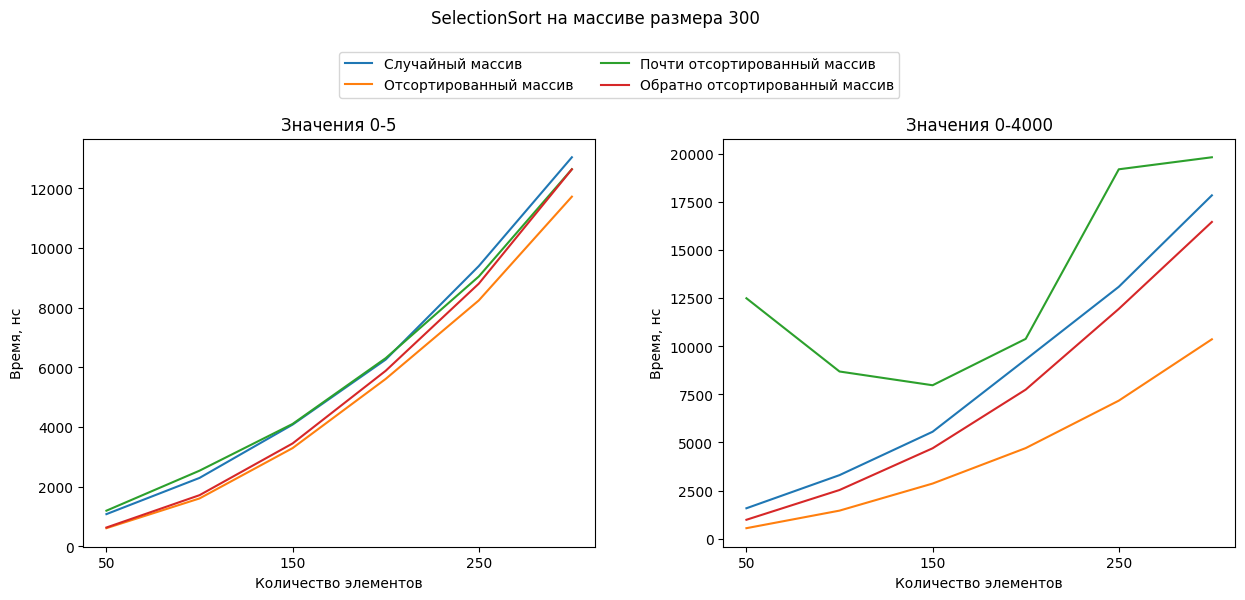

In [723]:
print_time_plot_300_size("SelectionSort")

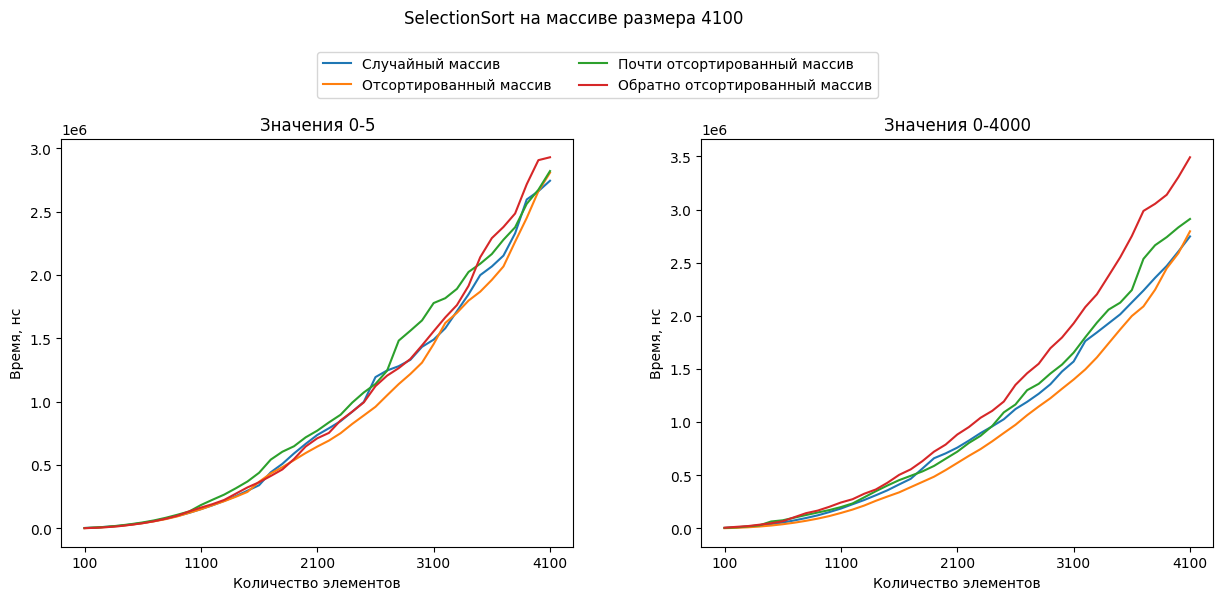

In [724]:
print_time_plot_4100_size("SelectionSort")

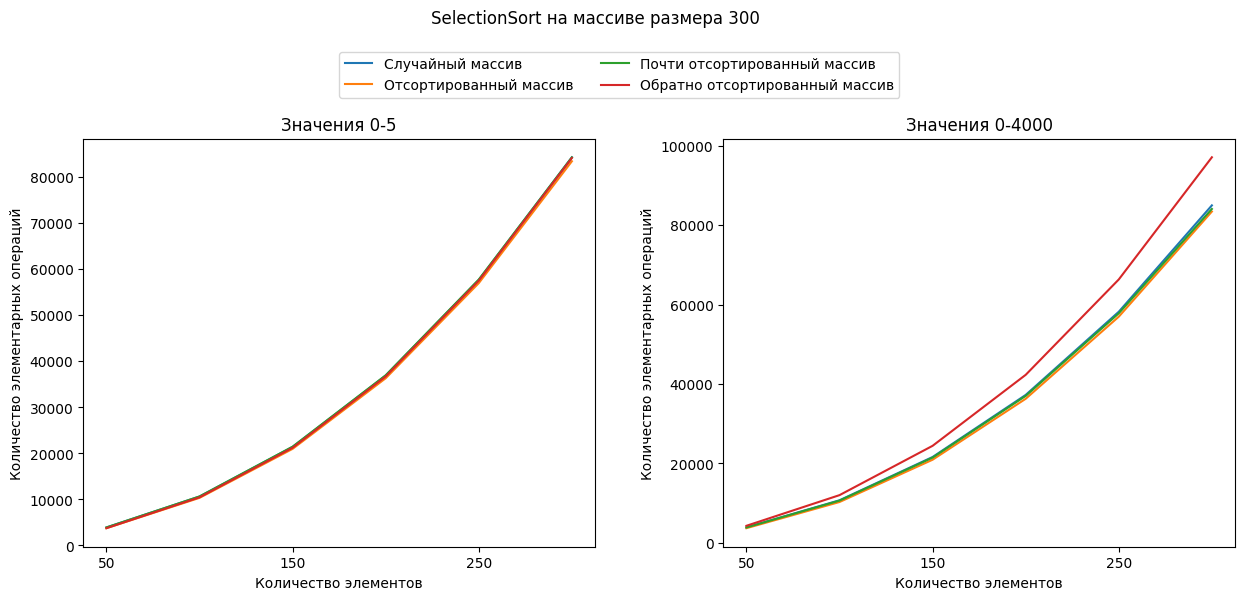

In [725]:
print_operations_plot_300_size("SelectionSort")

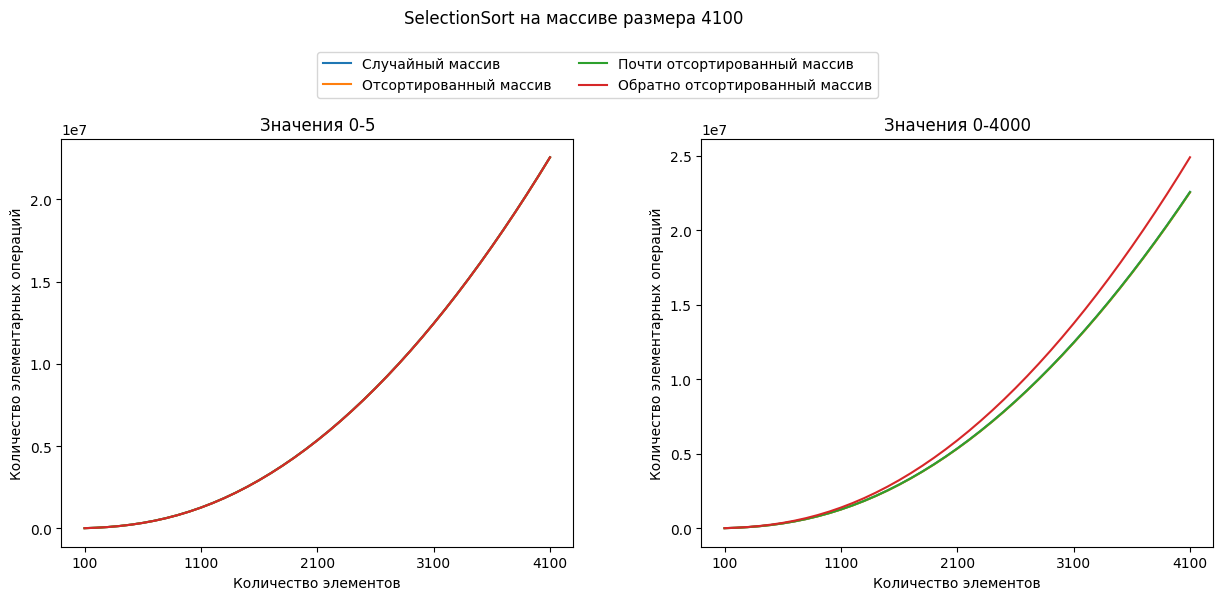

In [726]:
print_operations_plot_4100_size("SelectionSort")

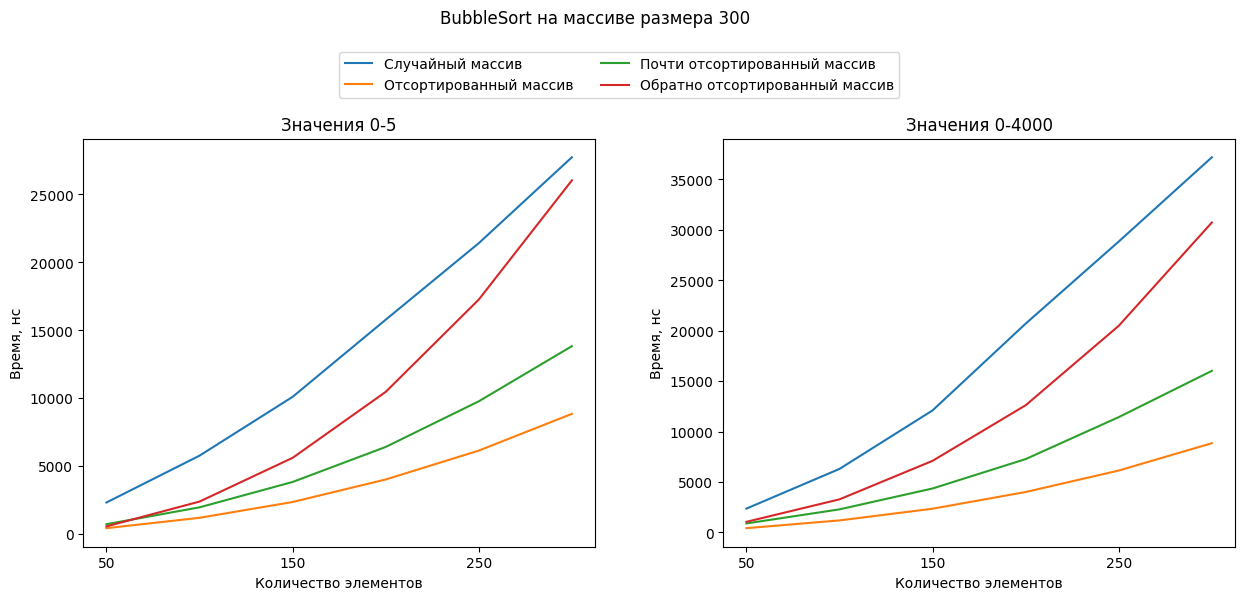

In [727]:
print_time_plot_300_size("BubbleSort")

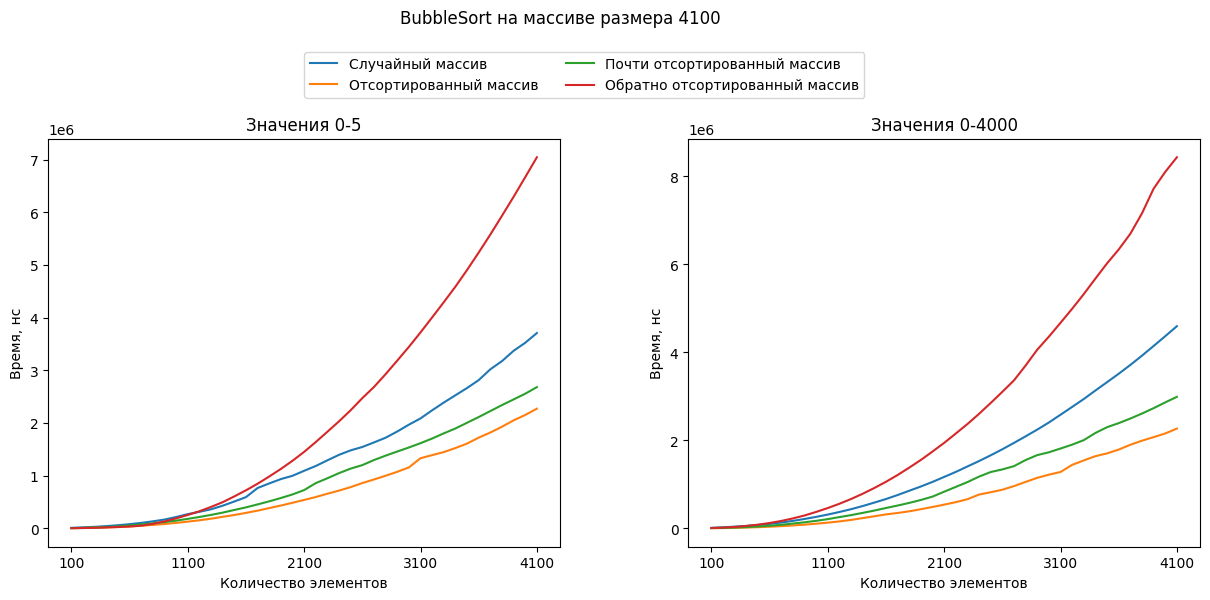

In [728]:
print_time_plot_4100_size("BubbleSort")

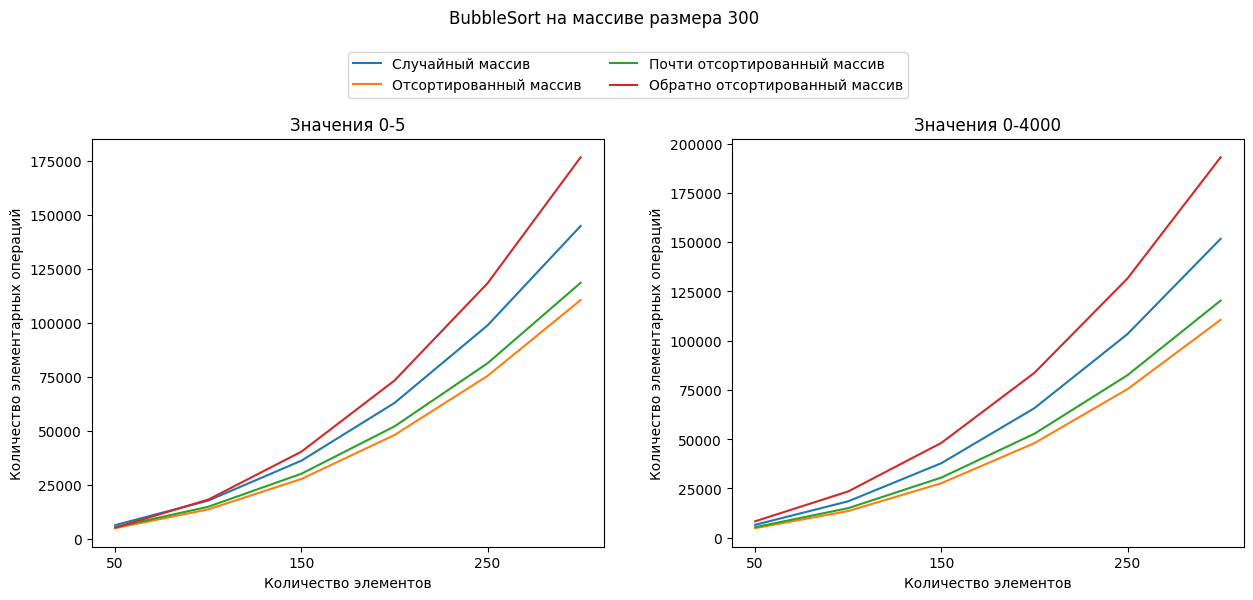

In [729]:
print_operations_plot_300_size("BubbleSort")

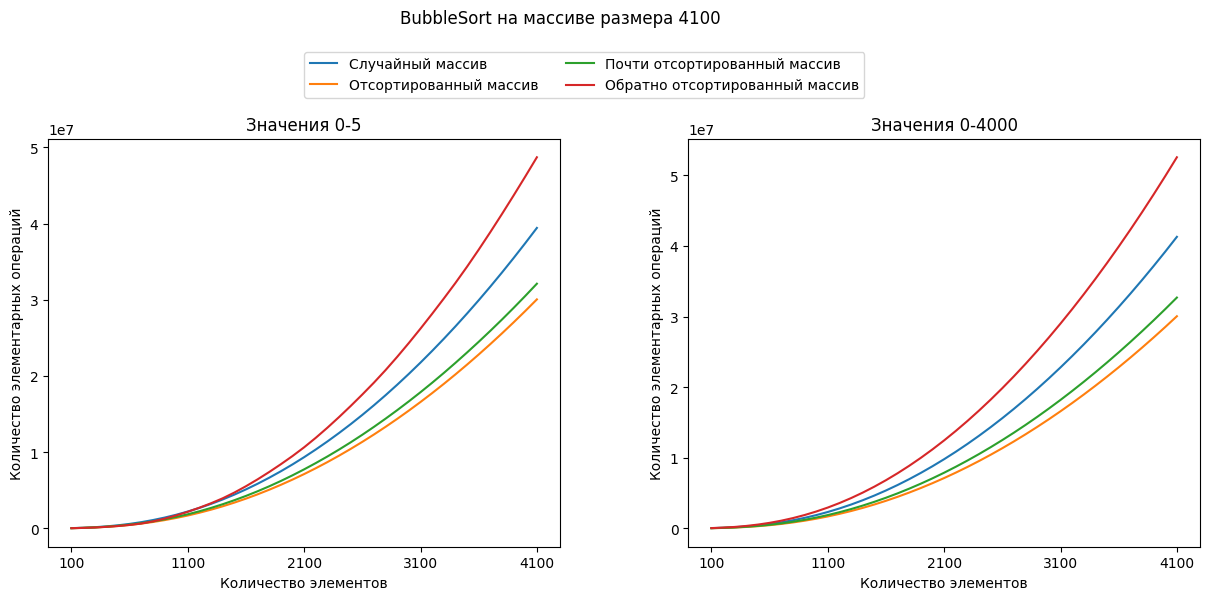

In [730]:
print_operations_plot_4100_size("BubbleSort")

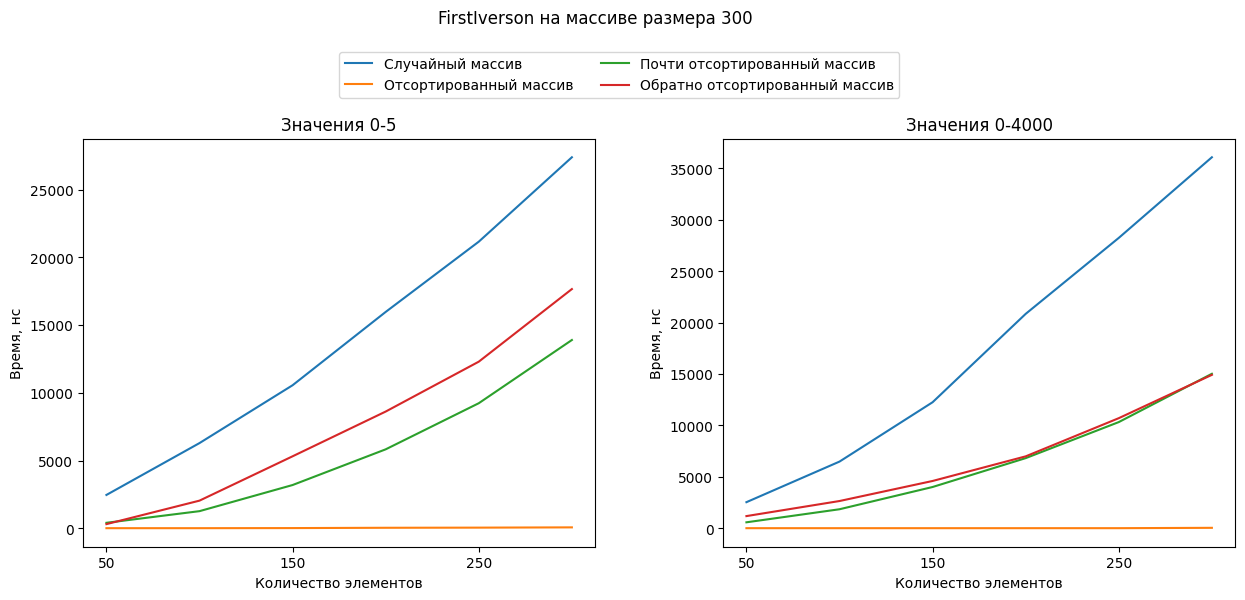

In [731]:
print_time_plot_300_size("FirstIverson")

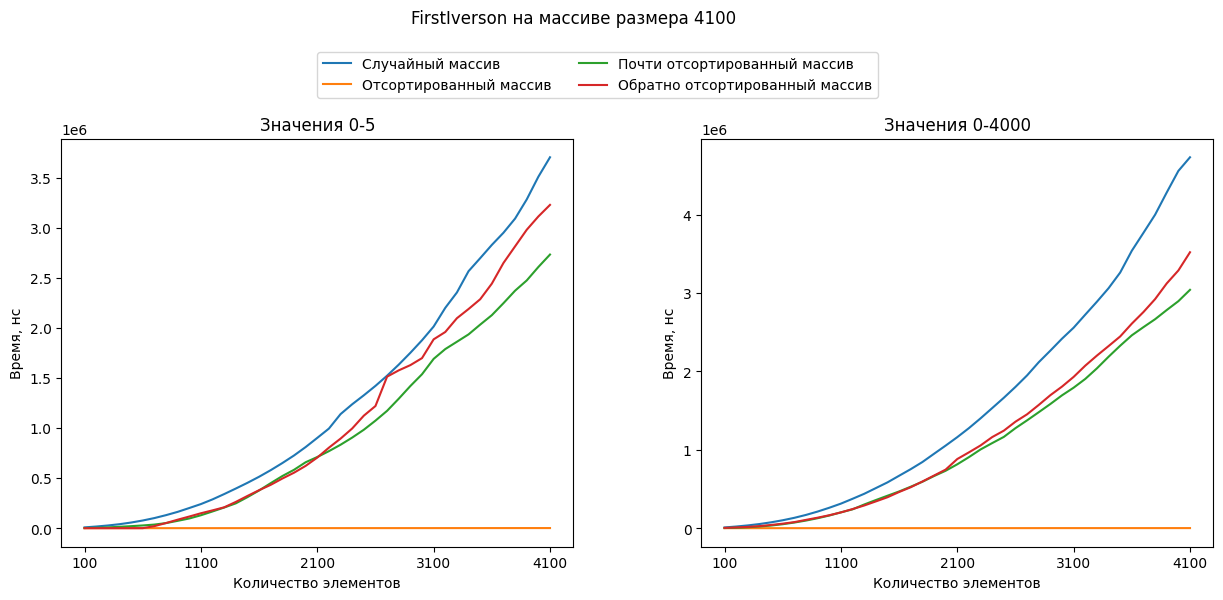

In [732]:
print_time_plot_4100_size("FirstIverson")

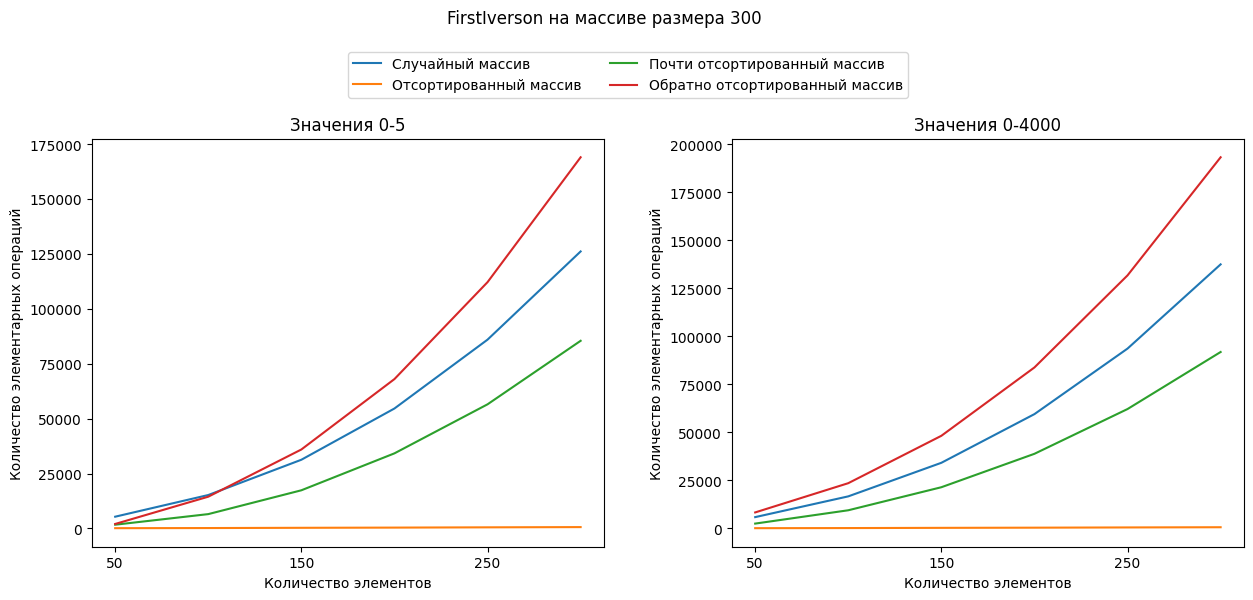

In [733]:
print_operations_plot_300_size("FirstIverson")

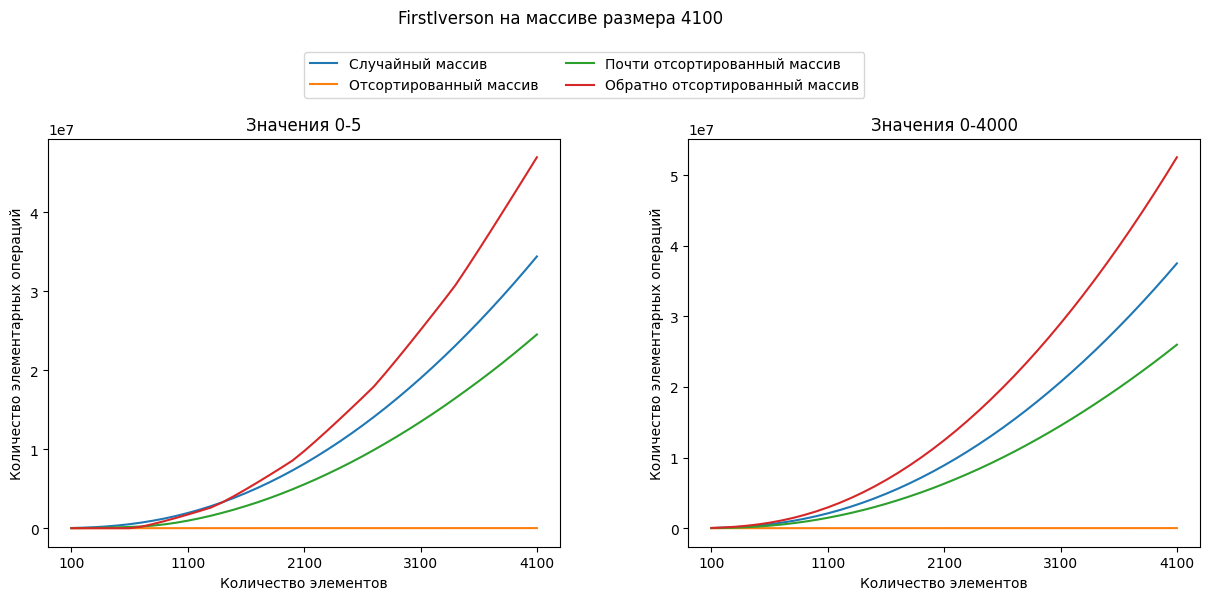

In [734]:
print_operations_plot_4100_size("FirstIverson")

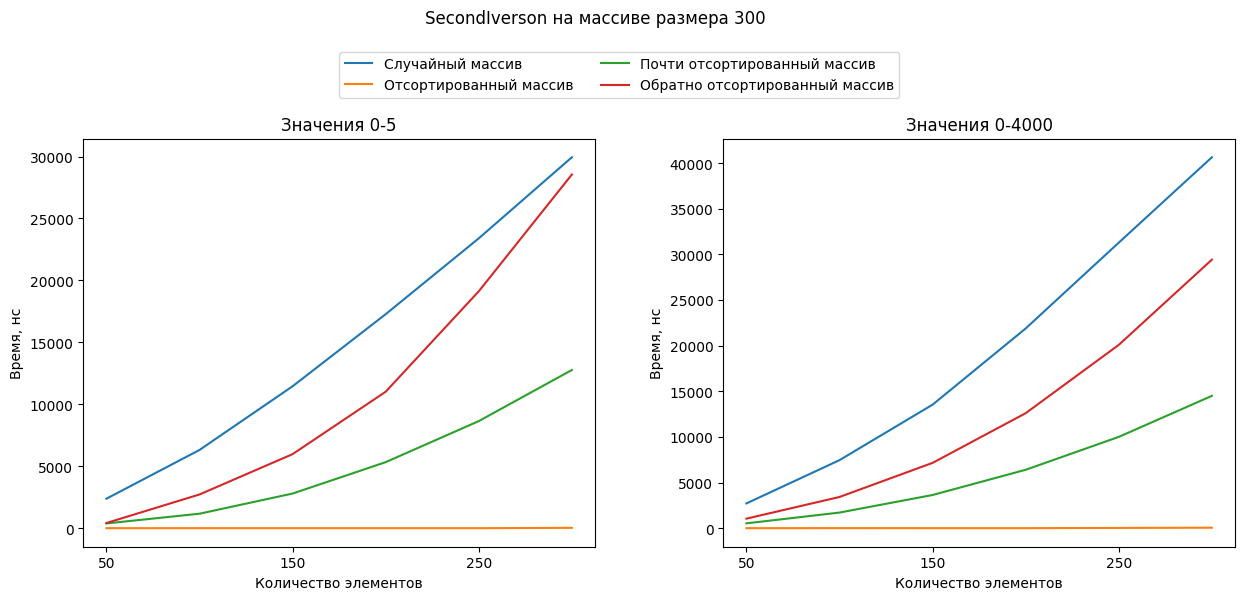

In [735]:
print_time_plot_300_size("SecondIverson")

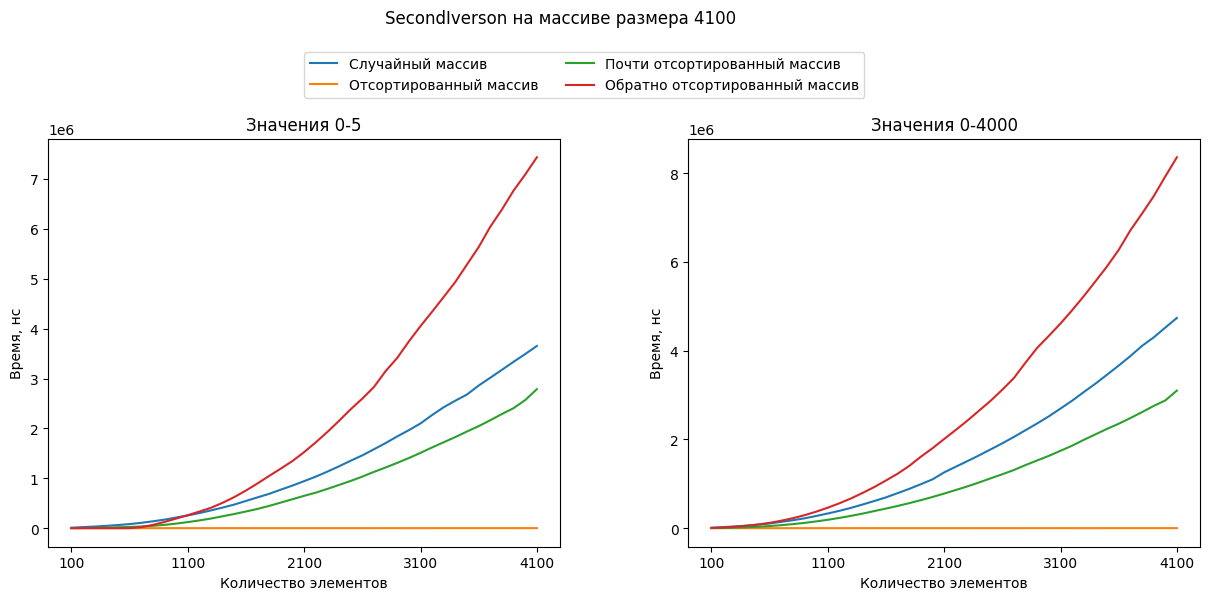

In [736]:
print_time_plot_4100_size("SecondIverson")

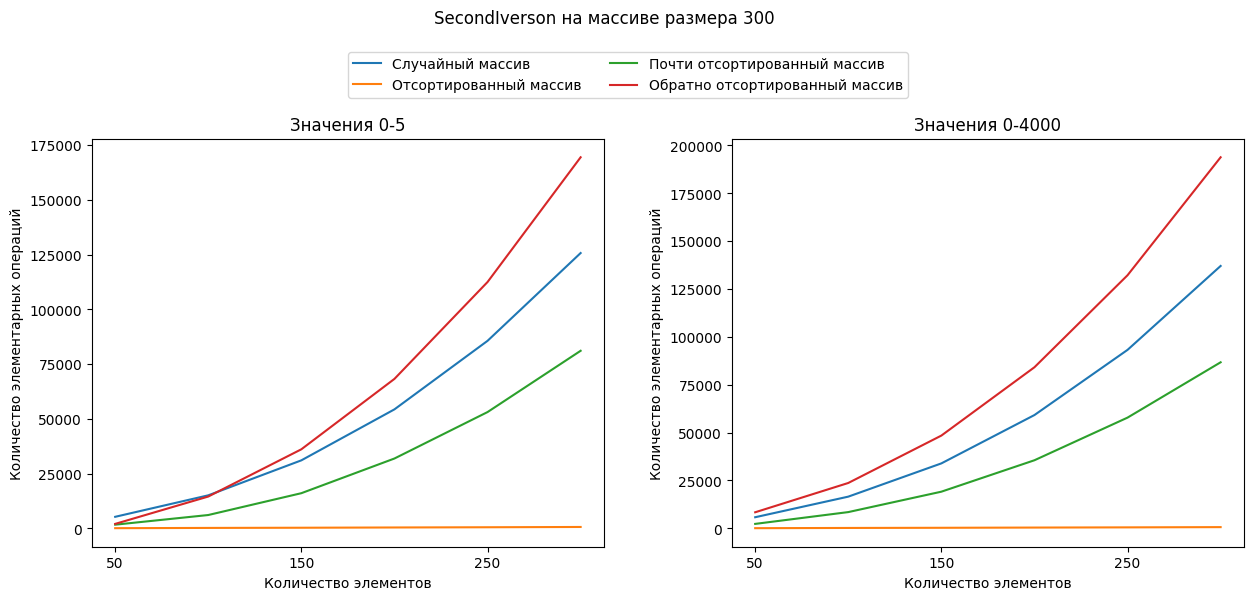

In [737]:
print_operations_plot_300_size("SecondIverson")

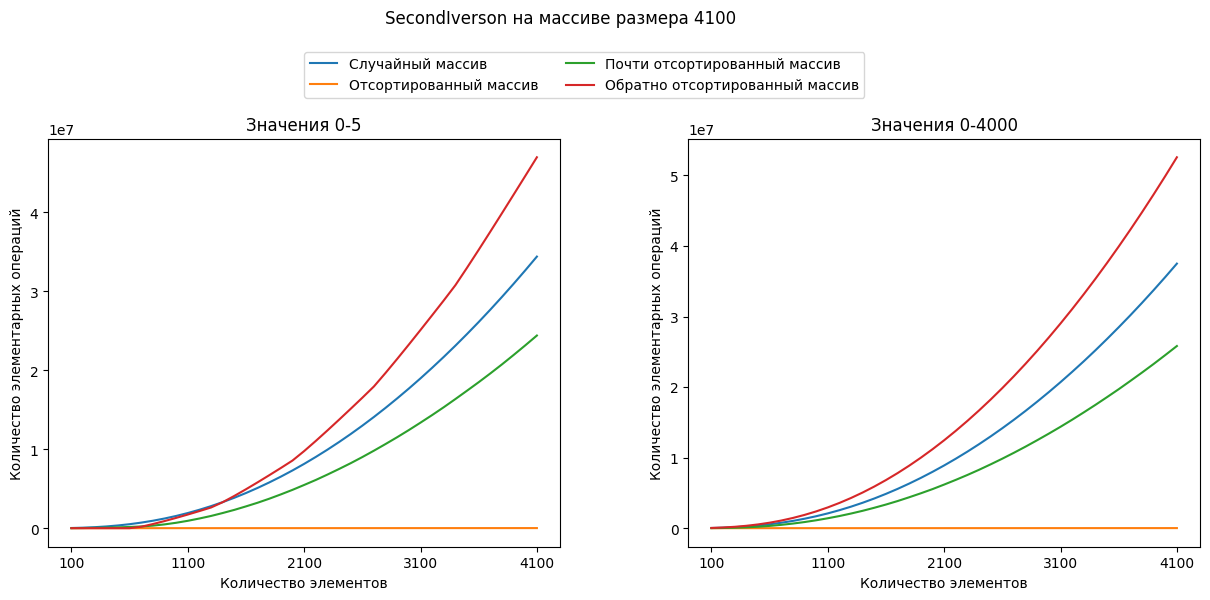

In [738]:
print_operations_plot_4100_size("SecondIverson")

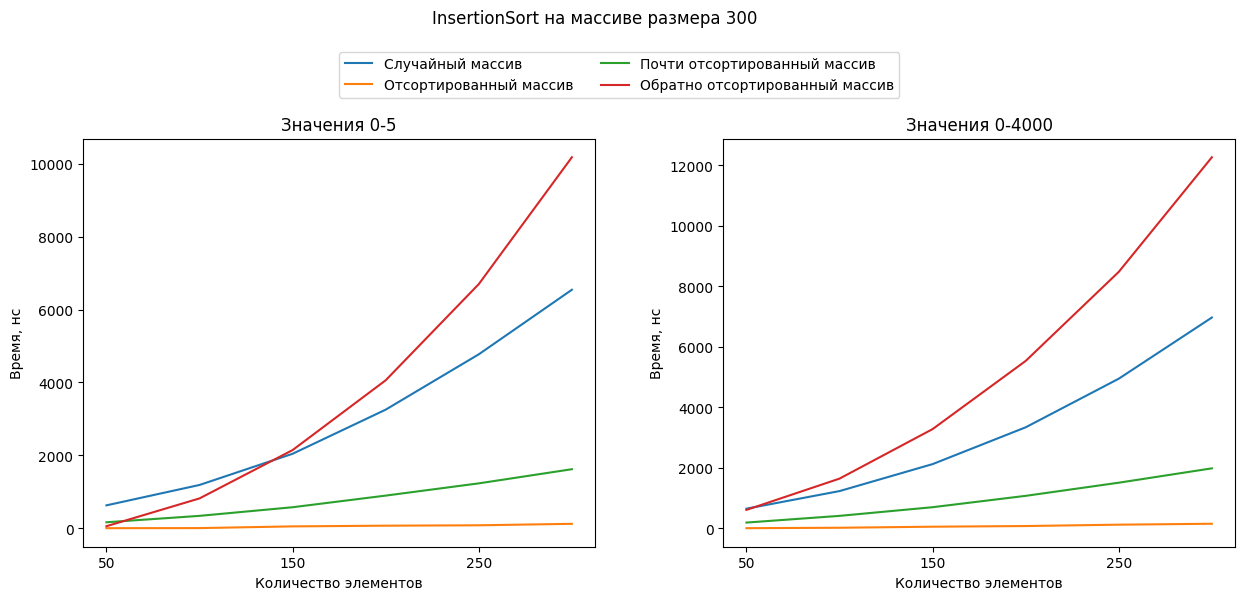

In [739]:
print_time_plot_300_size("InsertionSort")

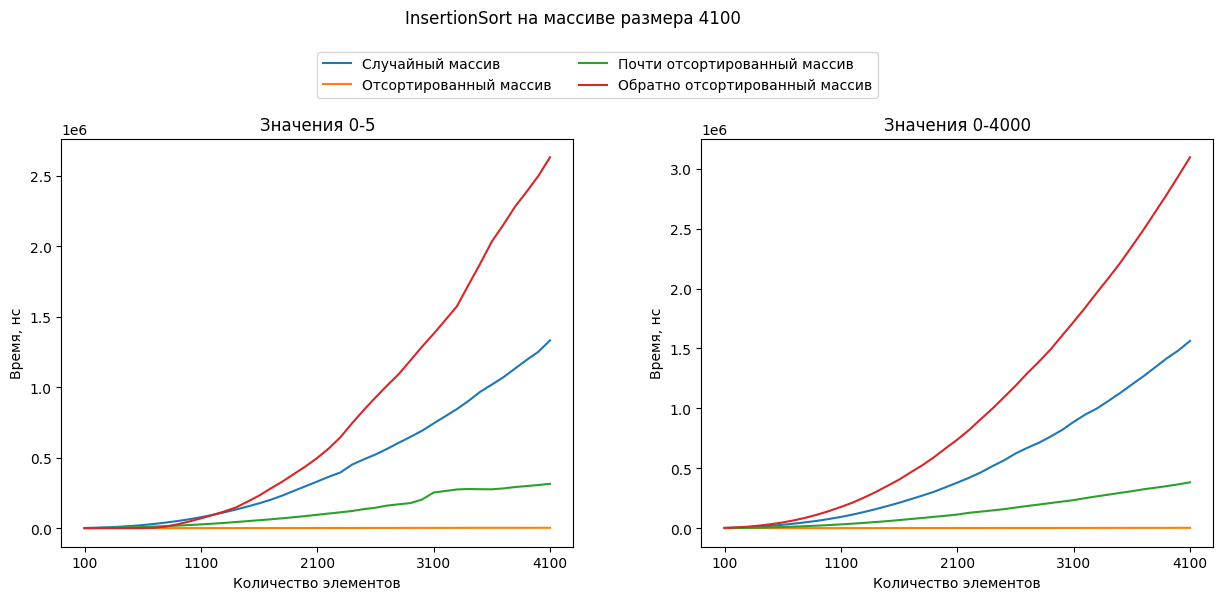

In [740]:
print_time_plot_4100_size("InsertionSort")

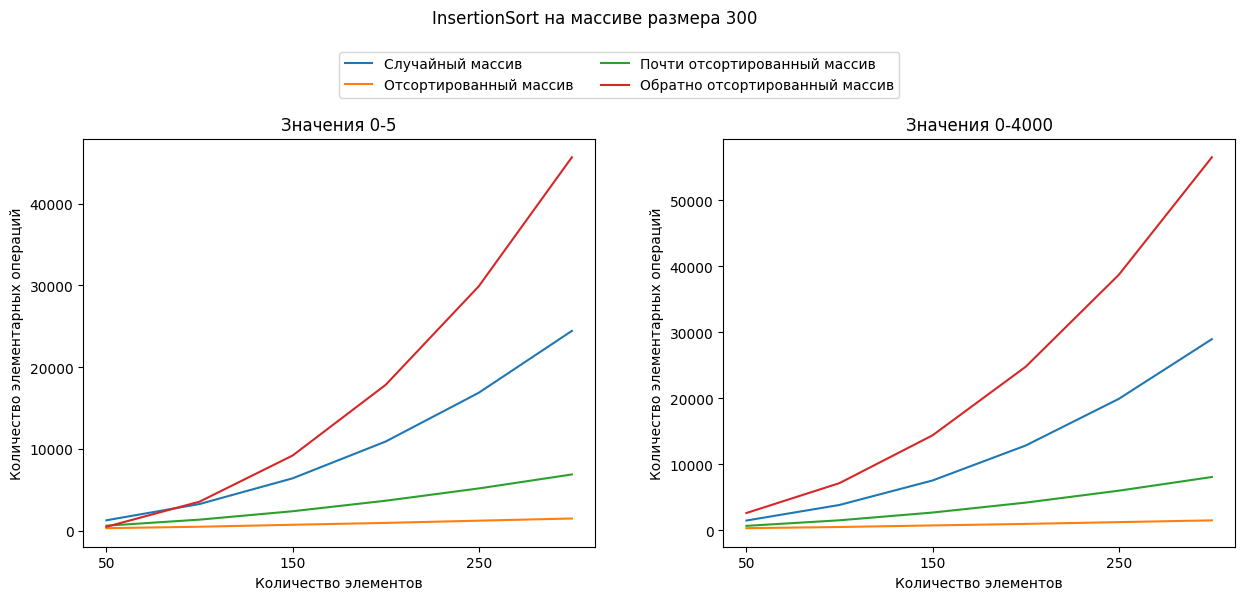

In [741]:
print_operations_plot_300_size("InsertionSort")

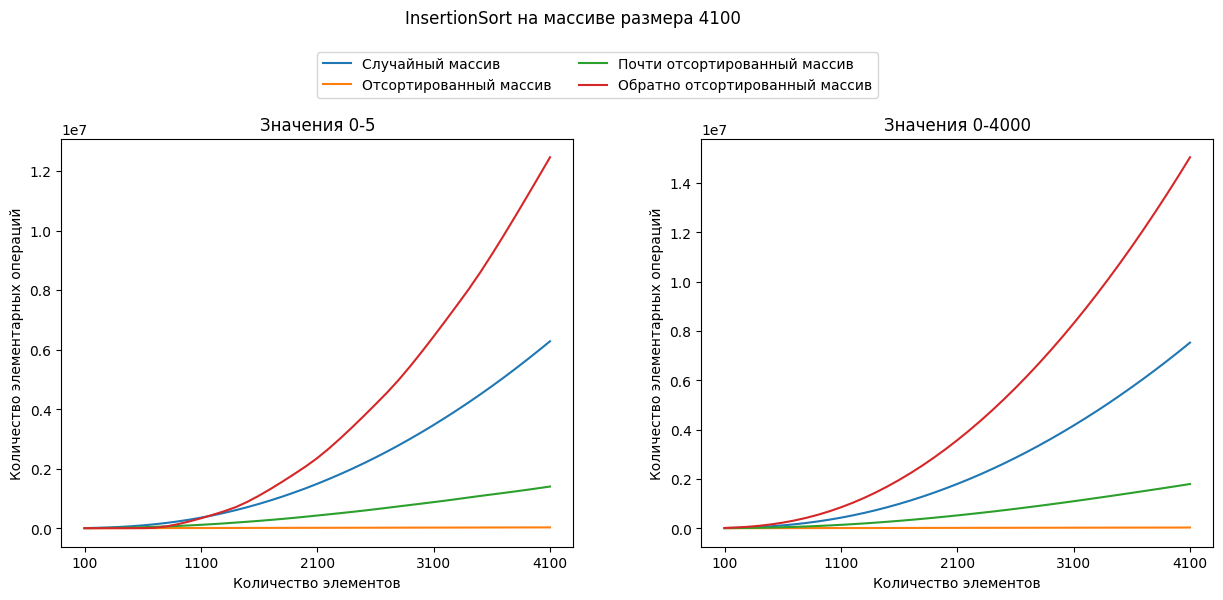

In [742]:
print_operations_plot_4100_size("InsertionSort")

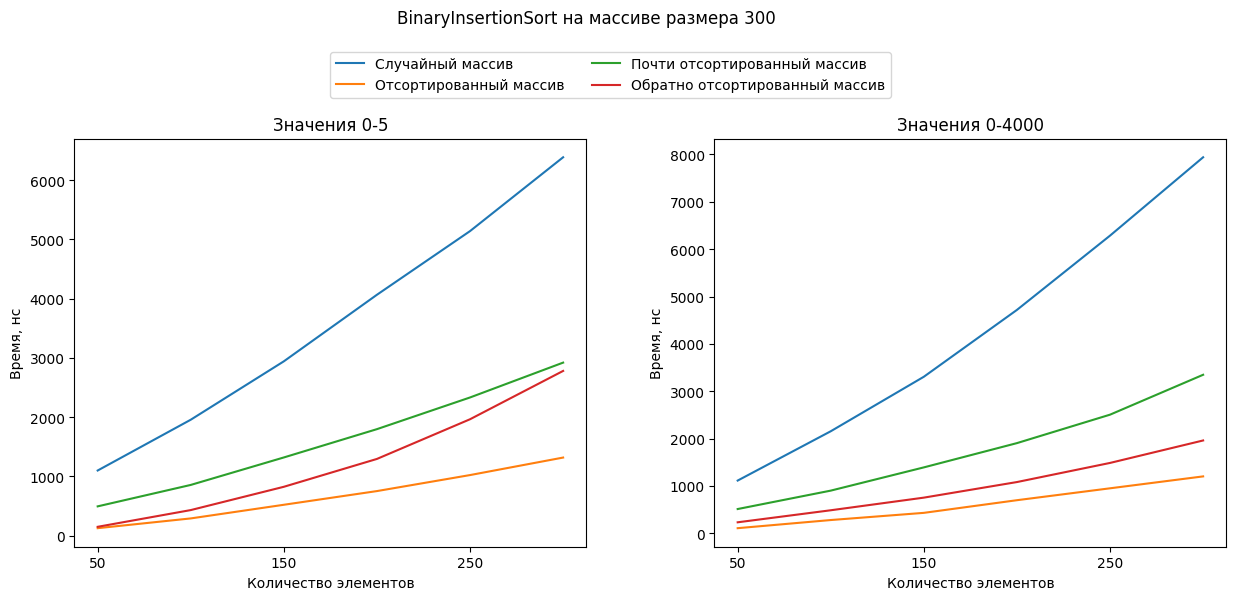

In [743]:
print_time_plot_300_size("BinaryInsertionSort")

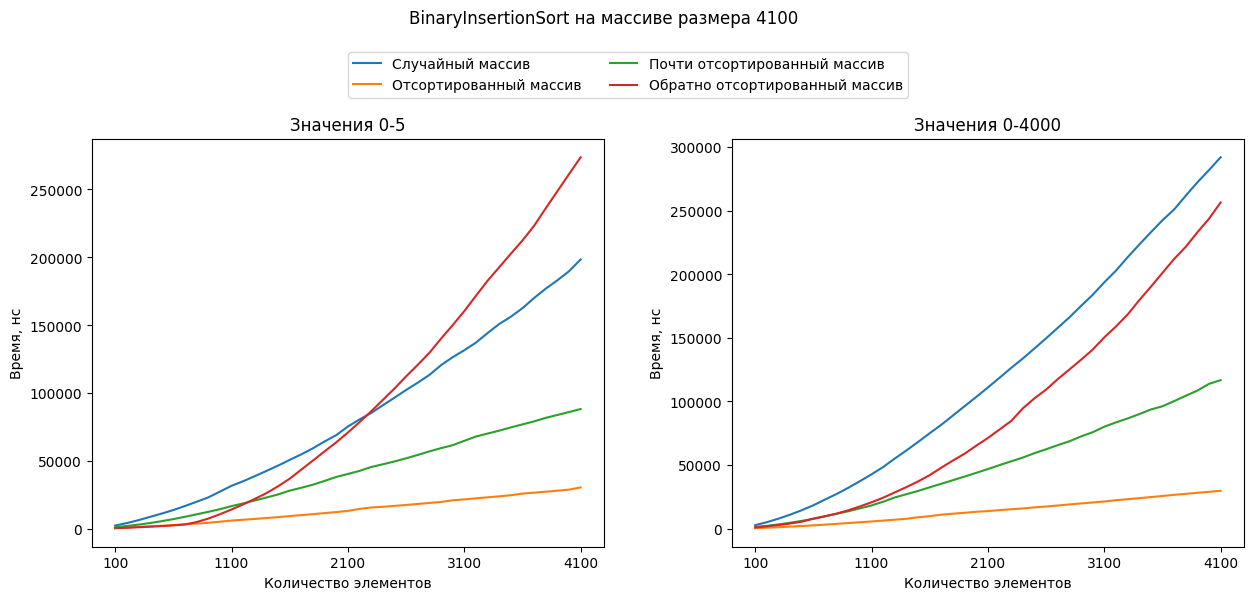

In [744]:
print_time_plot_4100_size("BinaryInsertionSort")

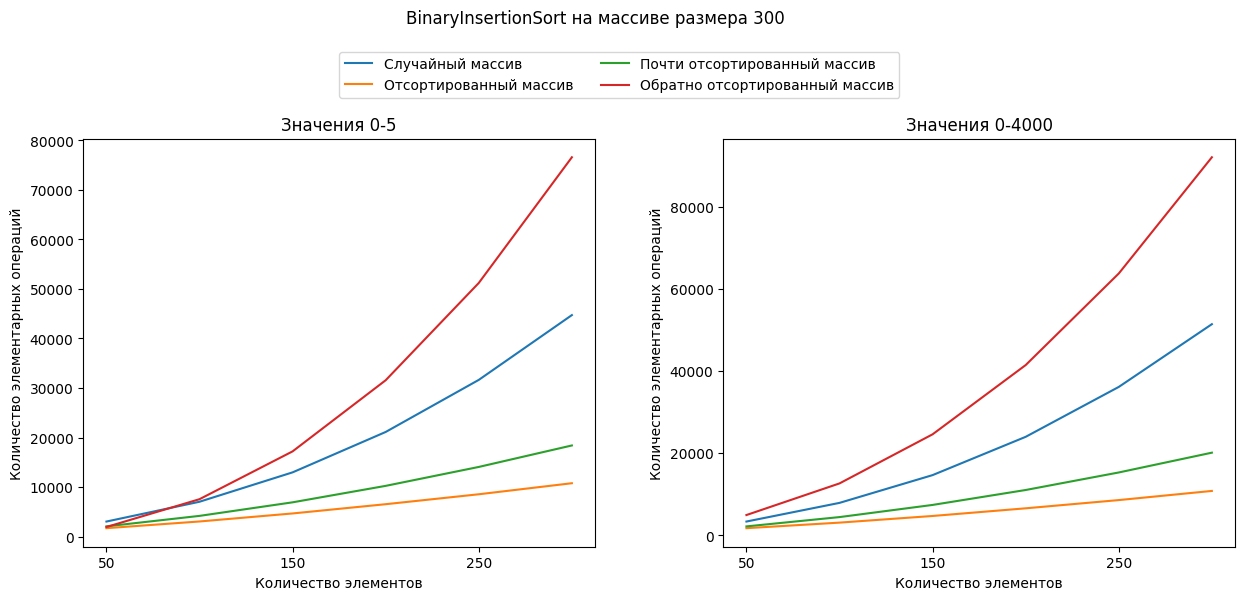

In [745]:
print_operations_plot_300_size("BinaryInsertionSort")

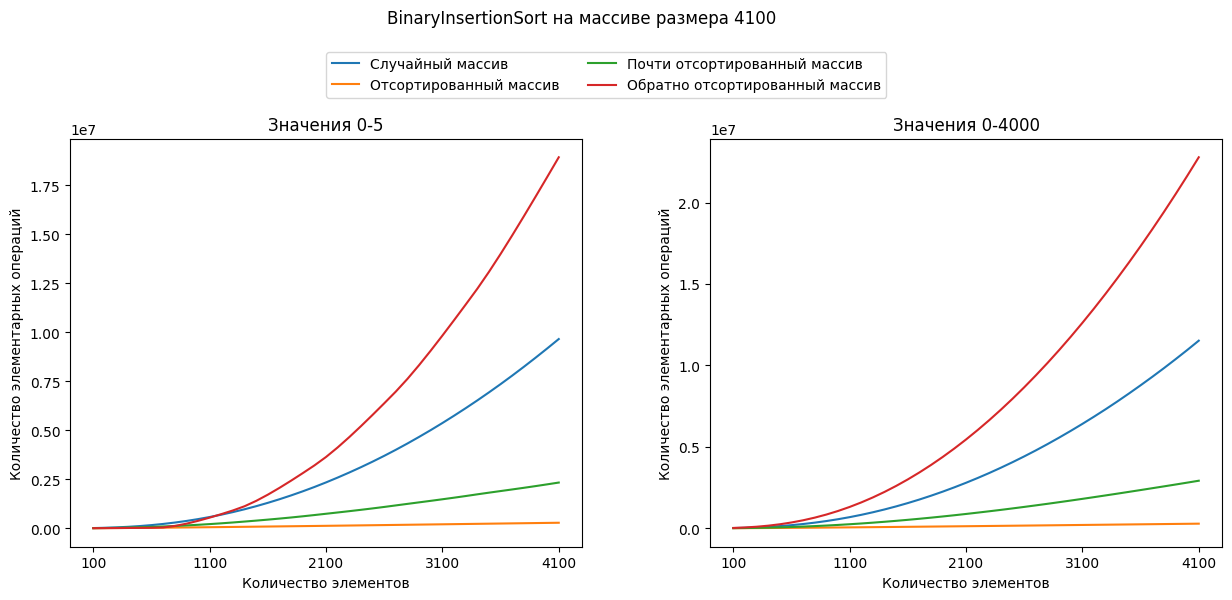

In [746]:
print_operations_plot_4100_size("BinaryInsertionSort")

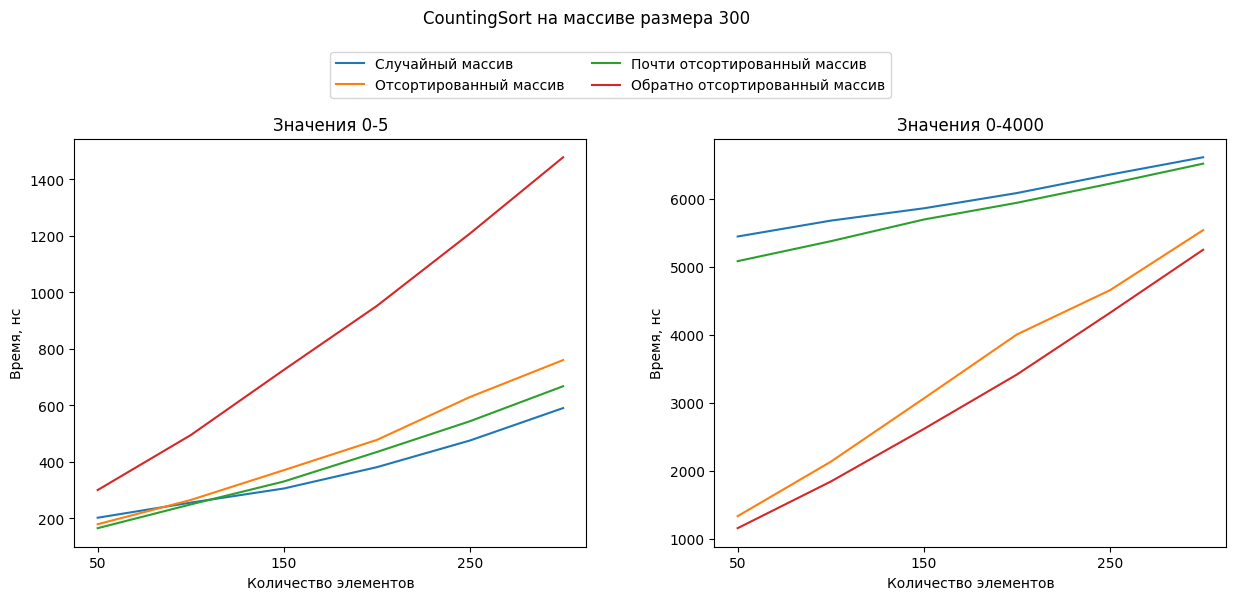

In [747]:
print_time_plot_300_size("CountingSort")

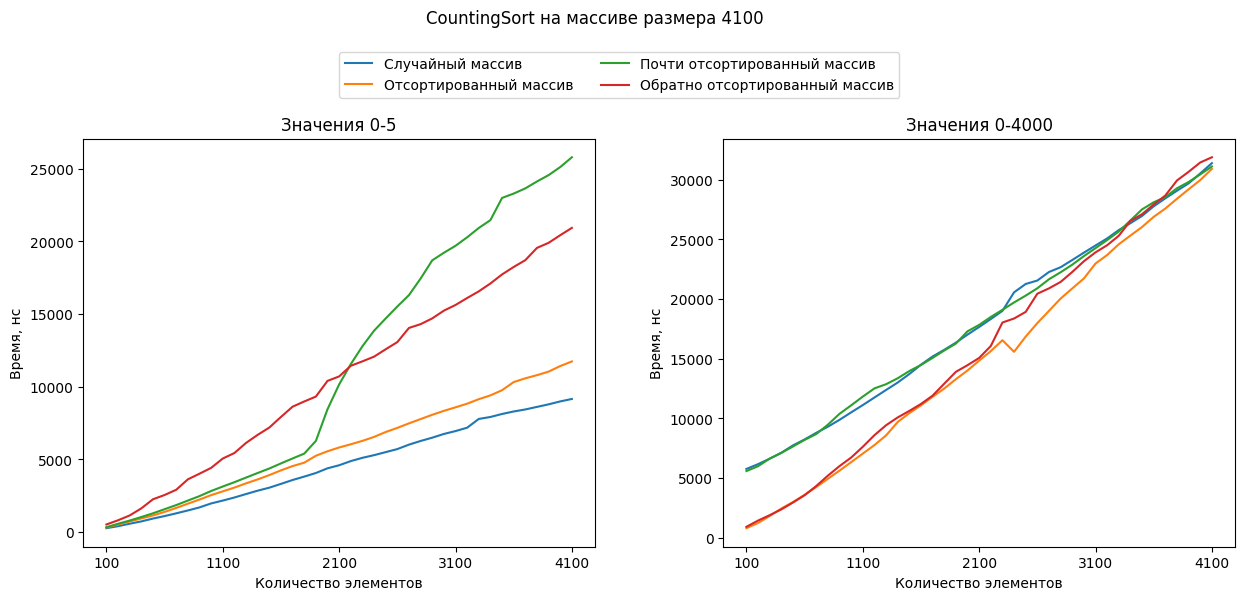

In [748]:
print_time_plot_4100_size("CountingSort")

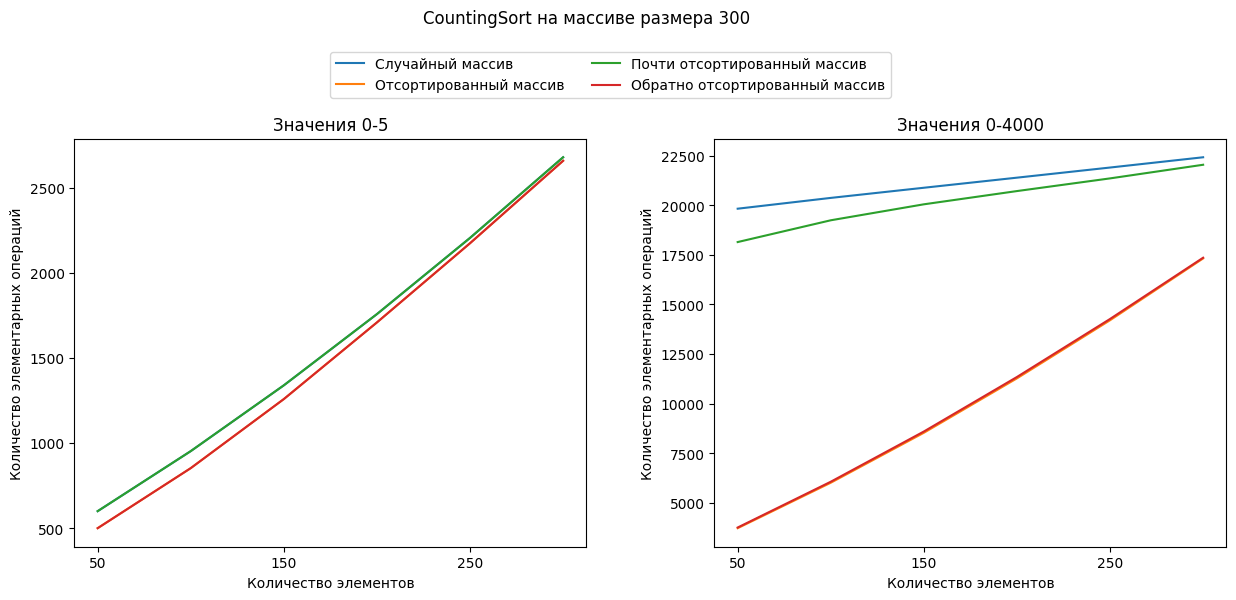

In [749]:
print_operations_plot_300_size("CountingSort")

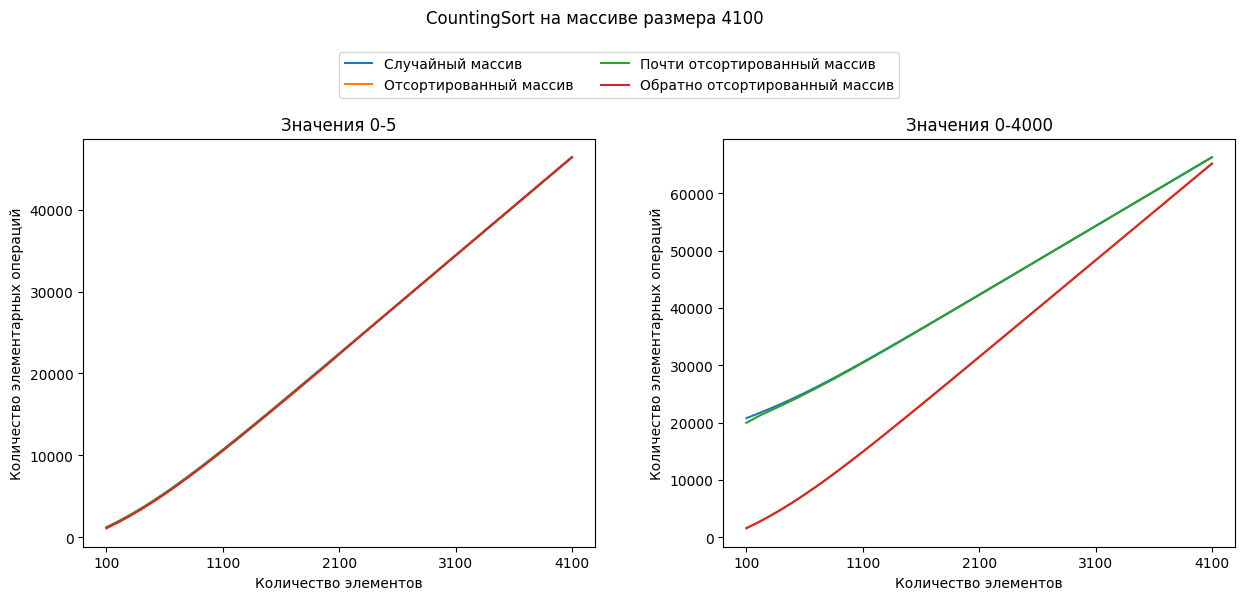

In [750]:
print_operations_plot_4100_size("CountingSort")

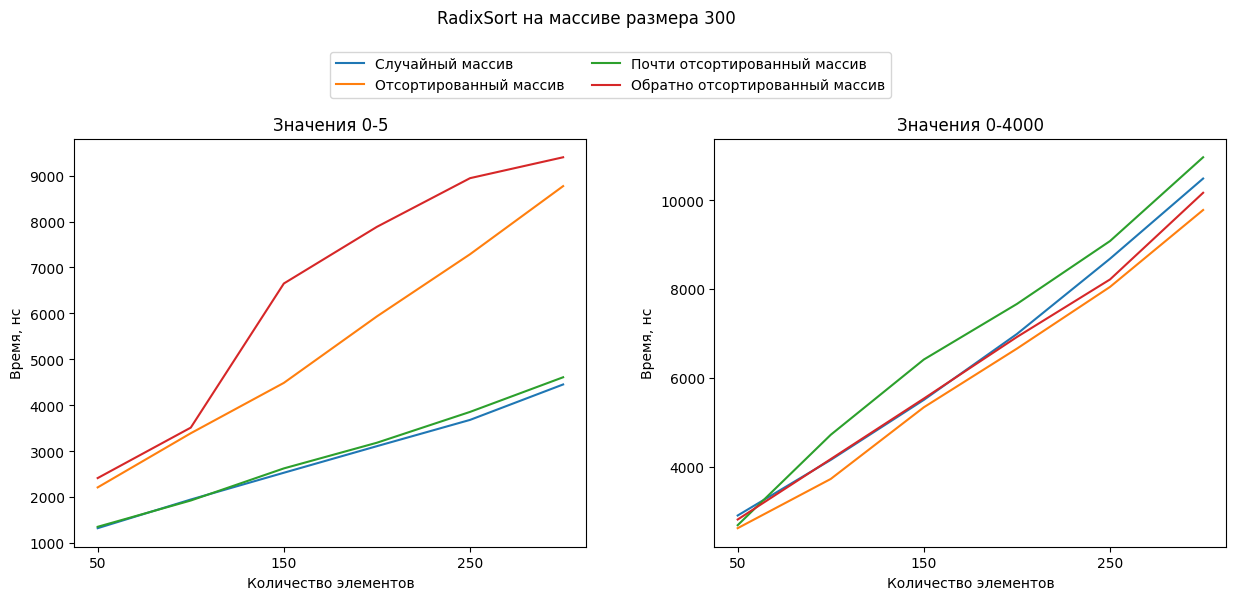

In [751]:
print_time_plot_300_size("RadixSort")

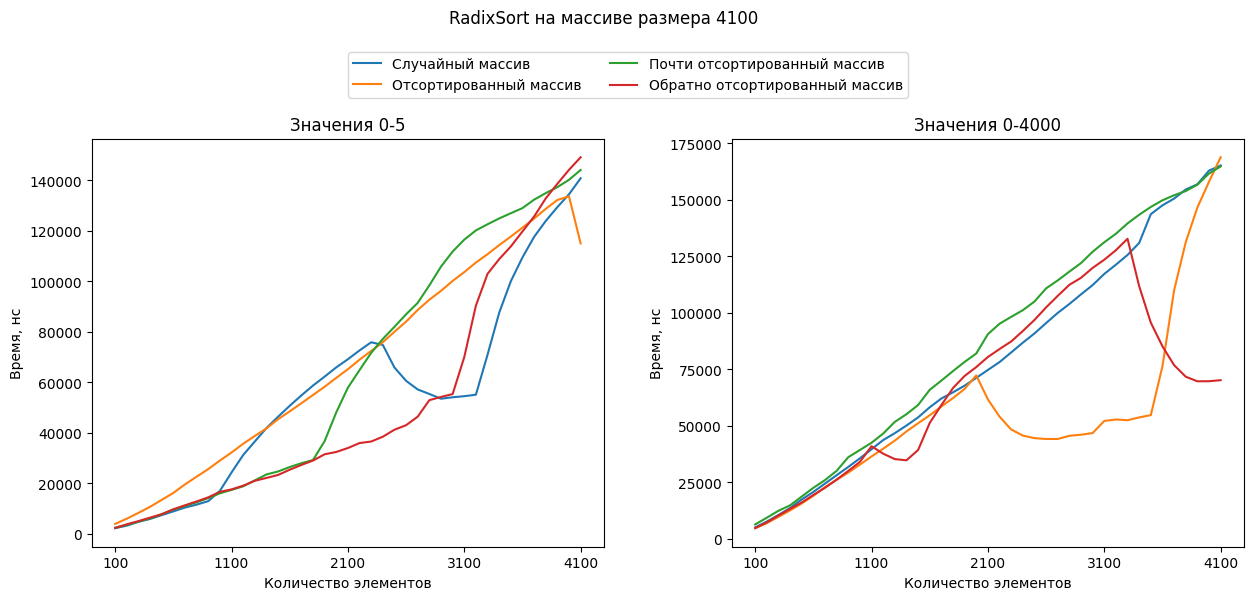

In [752]:
print_time_plot_4100_size("RadixSort")

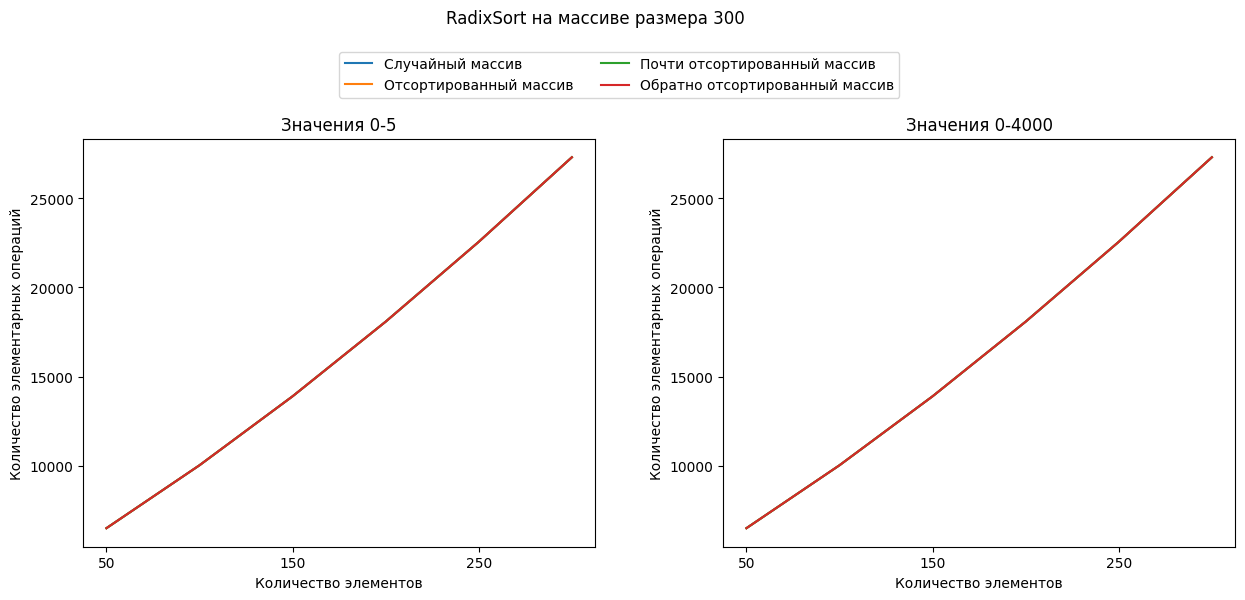

In [753]:
print_operations_plot_300_size("RadixSort")

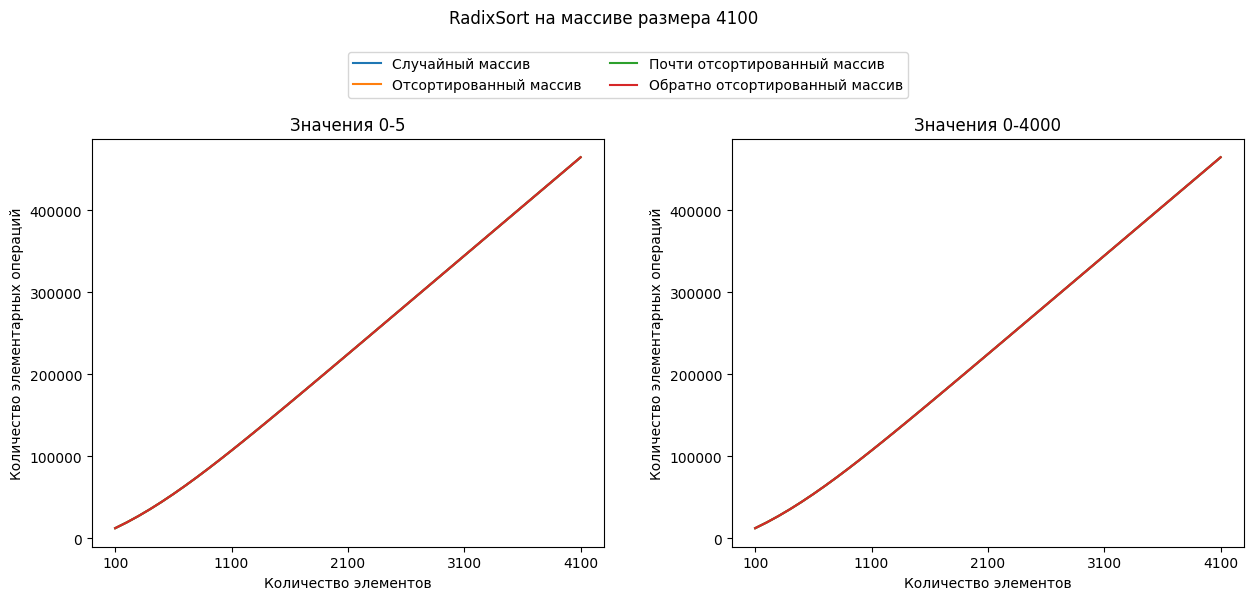

In [754]:
print_operations_plot_4100_size("RadixSort")

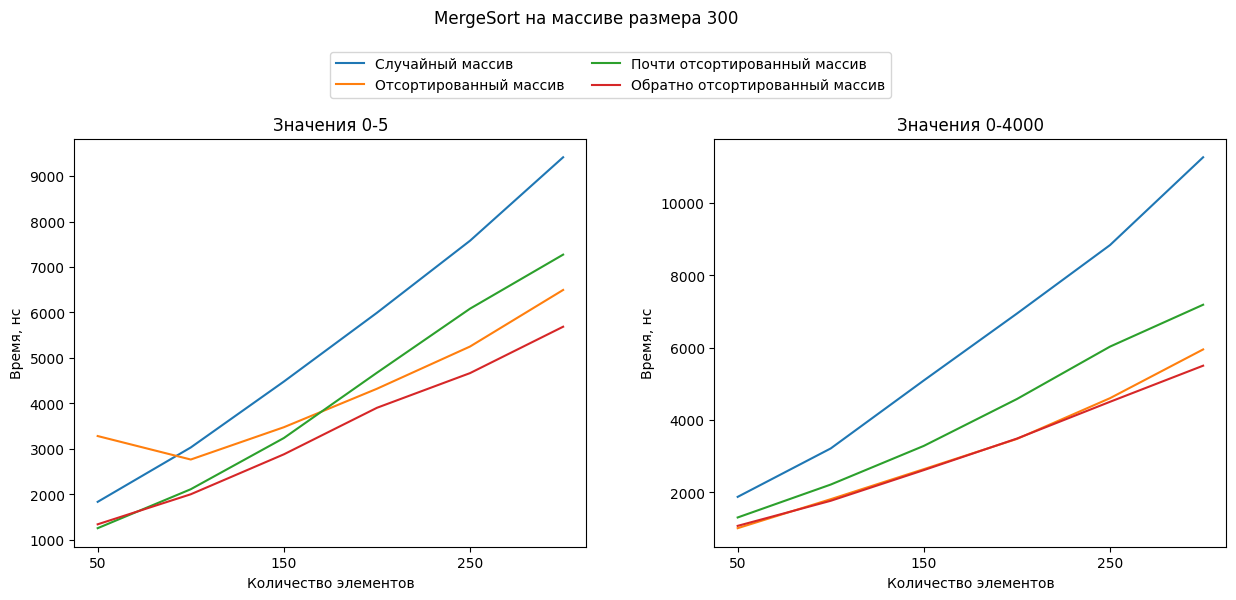

In [755]:
print_time_plot_300_size("MergeSort")

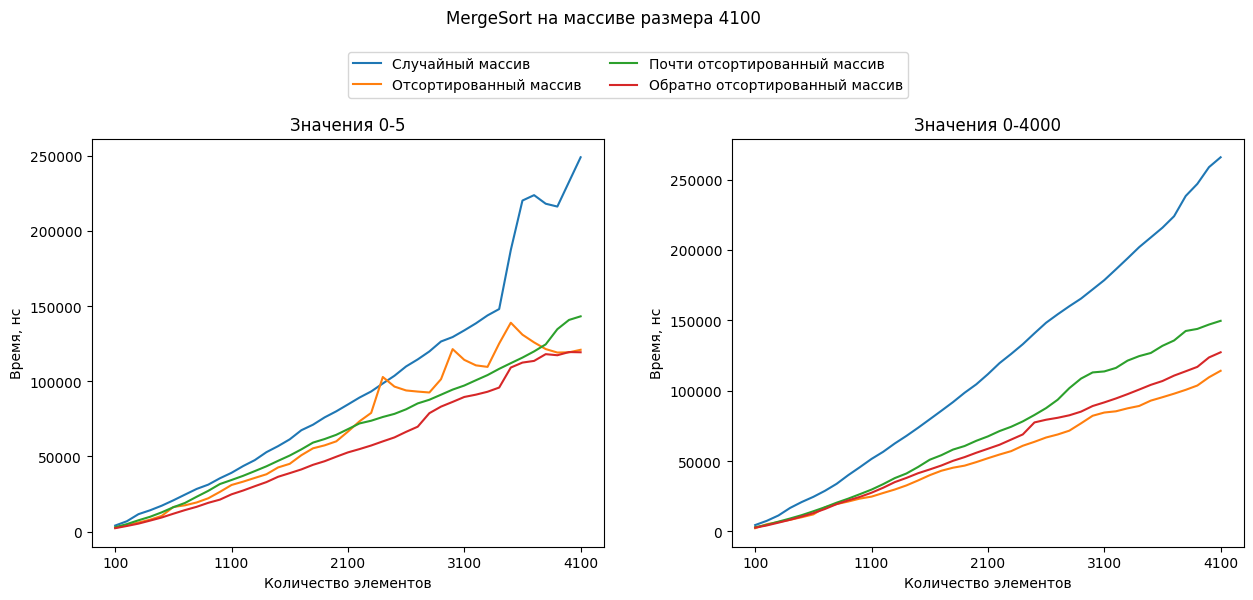

In [756]:
print_time_plot_4100_size("MergeSort")

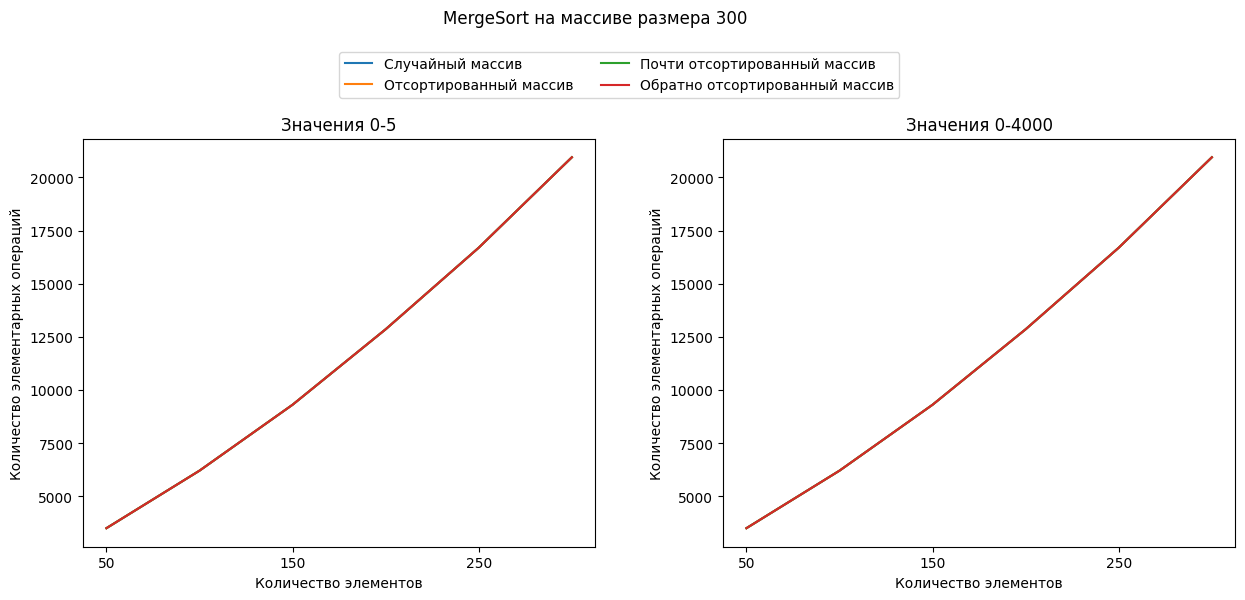

In [757]:
print_operations_plot_300_size("MergeSort")

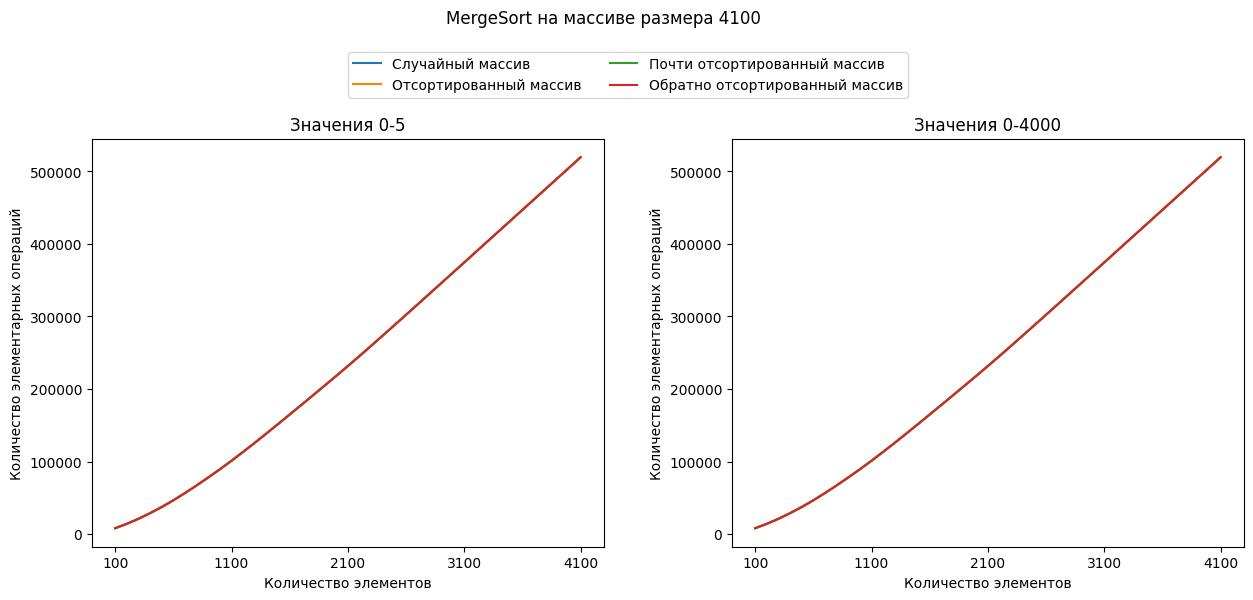

In [758]:
print_operations_plot_4100_size("MergeSort")

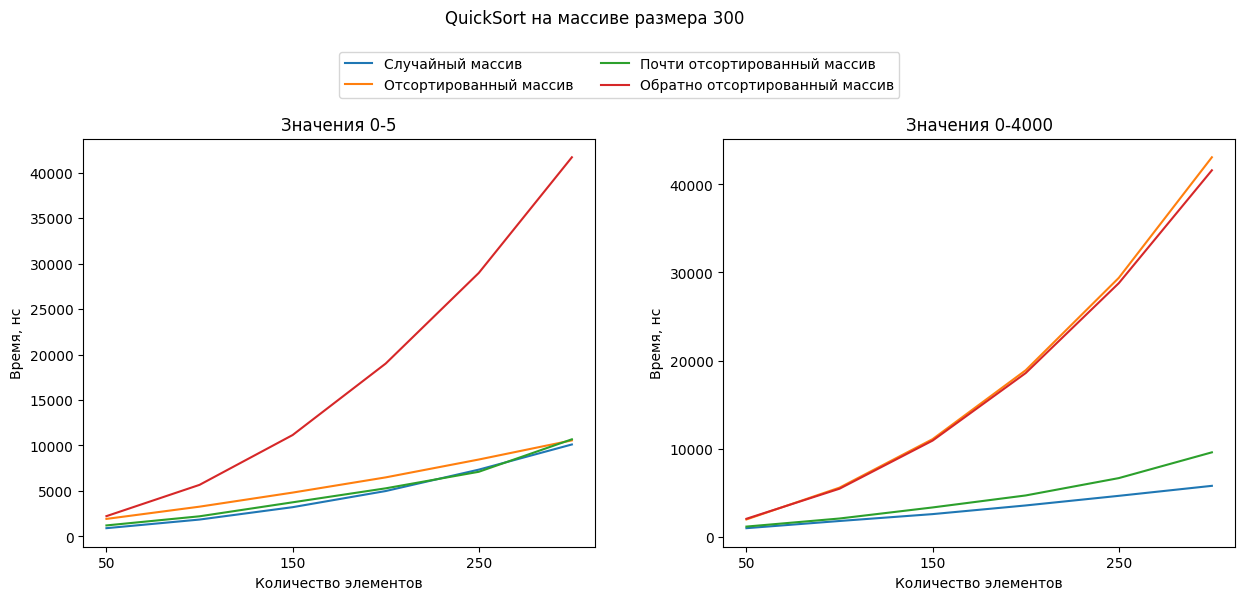

In [759]:
print_time_plot_300_size("QuickSort")

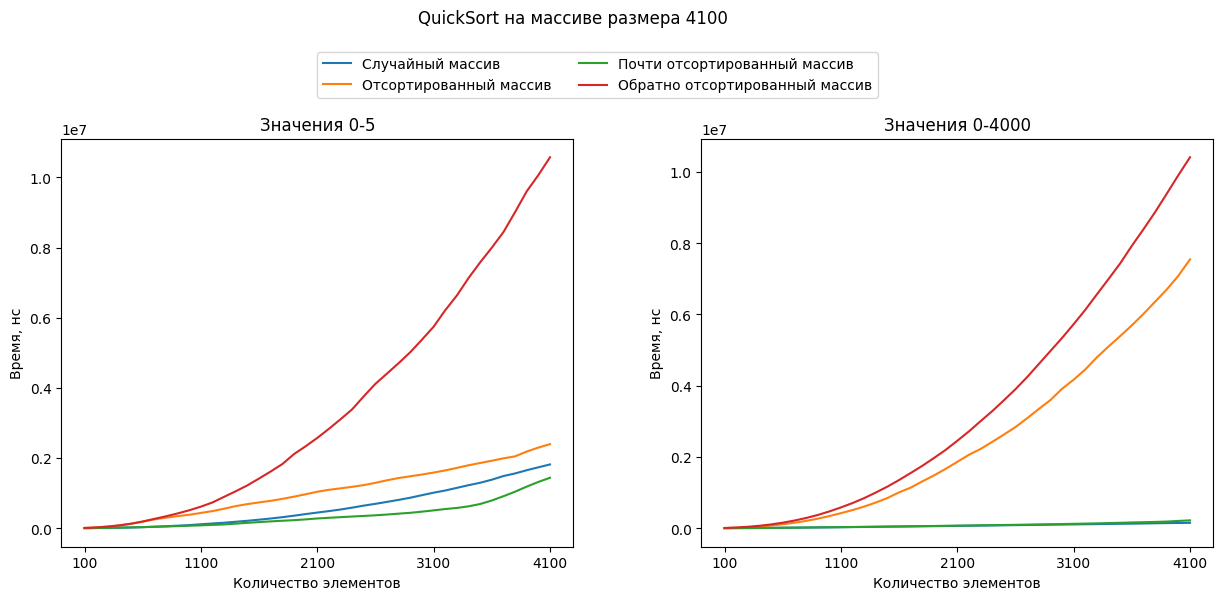

In [760]:
print_time_plot_4100_size("QuickSort")

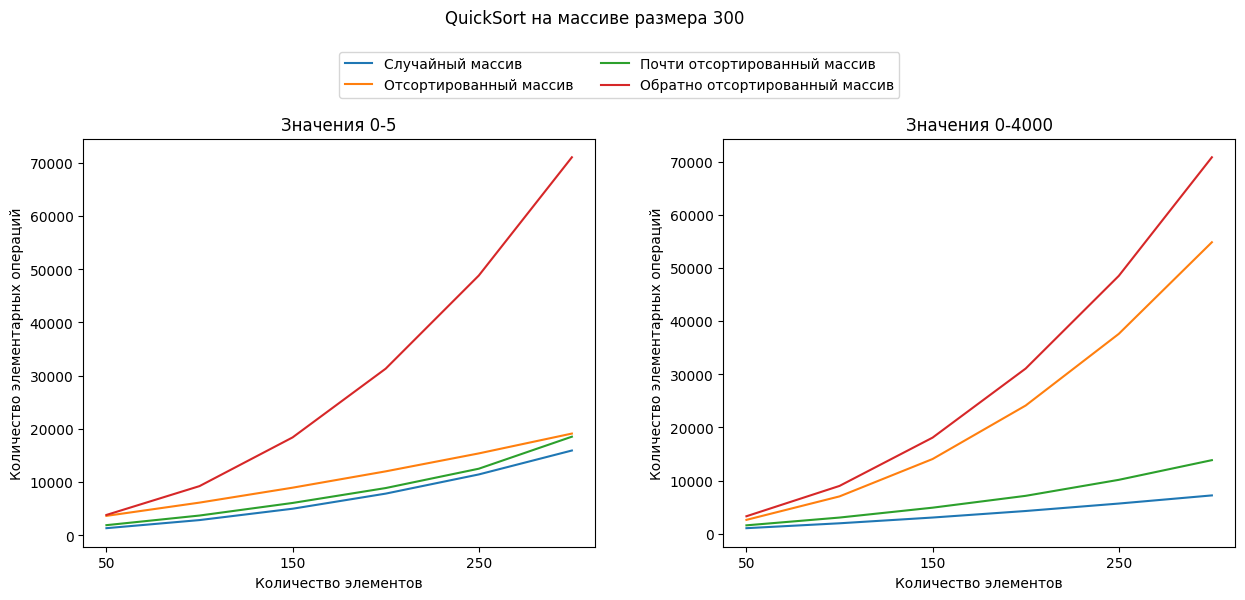

In [761]:
print_operations_plot_300_size("QuickSort")

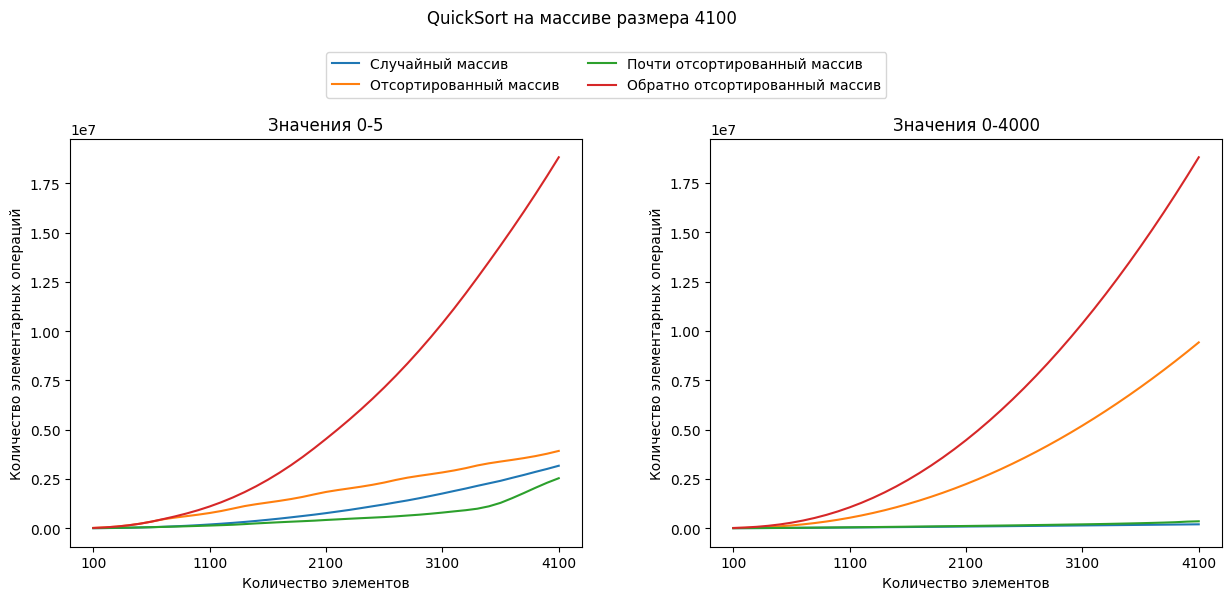

In [762]:
print_operations_plot_4100_size("QuickSort")

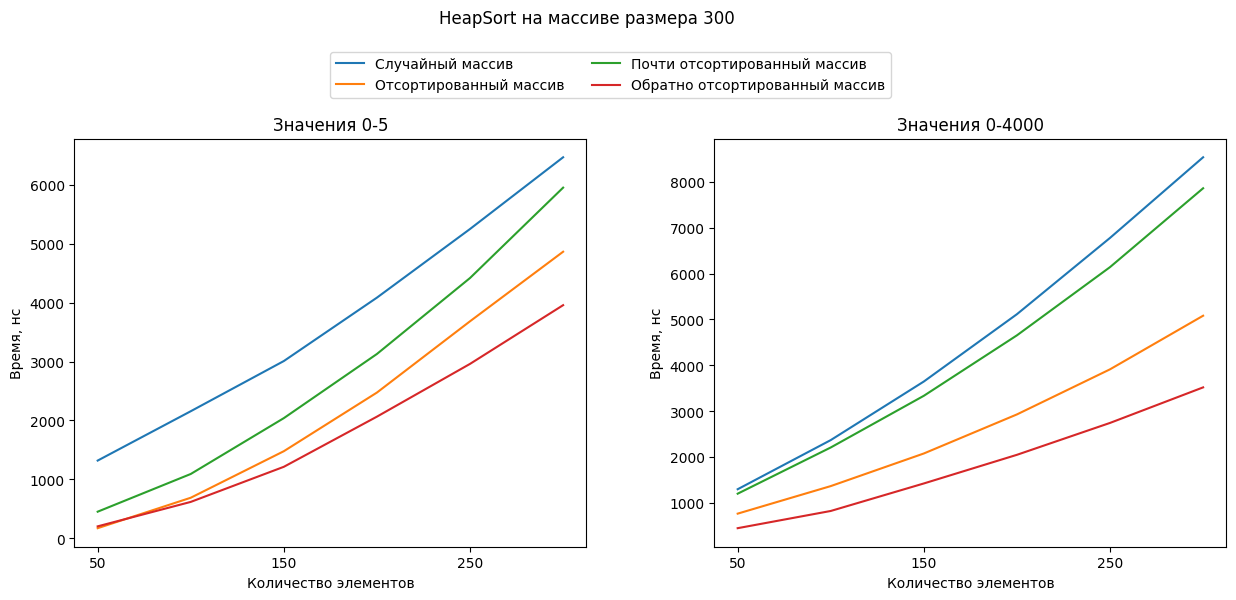

In [763]:
print_time_plot_300_size("HeapSort")

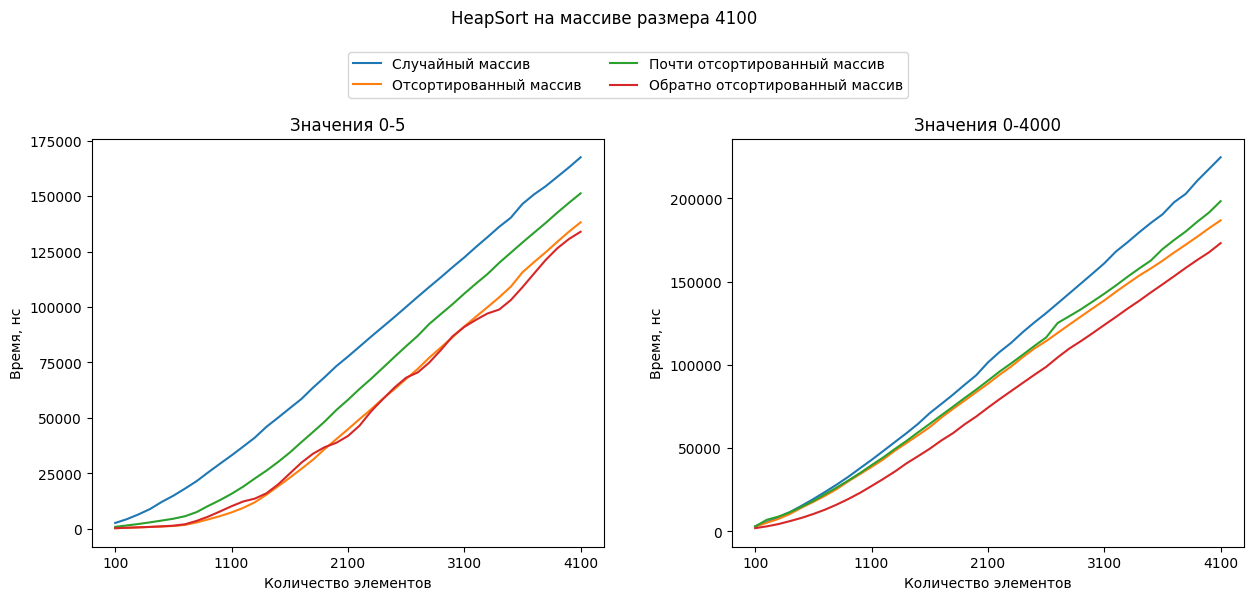

In [764]:
print_time_plot_4100_size("HeapSort")

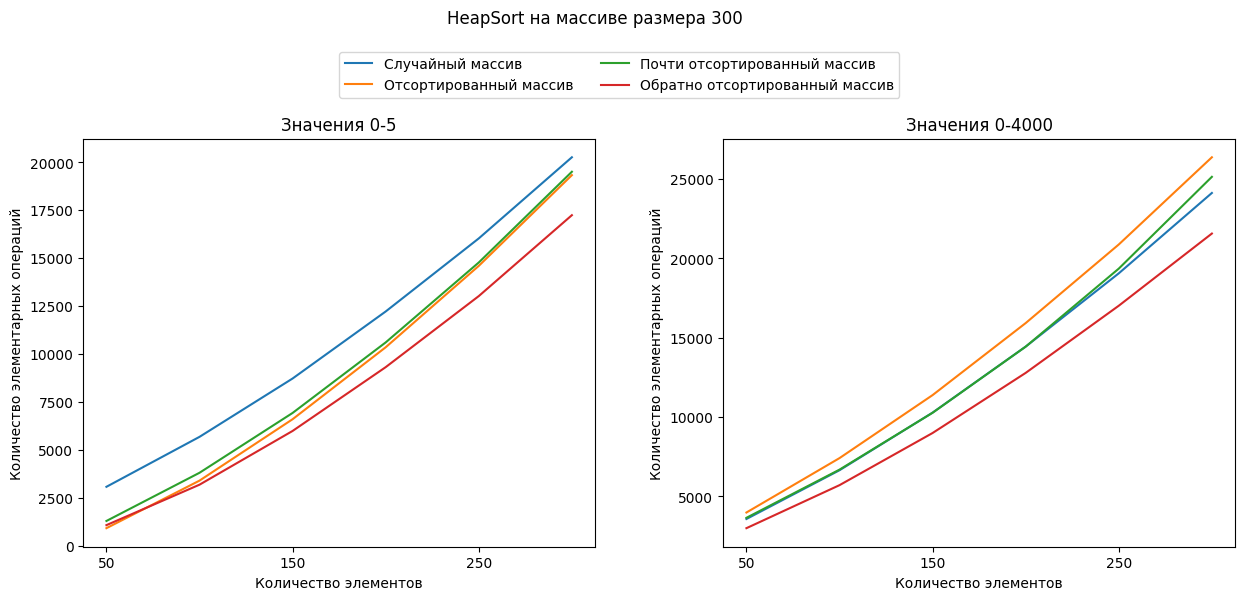

In [765]:
print_operations_plot_300_size("HeapSort")

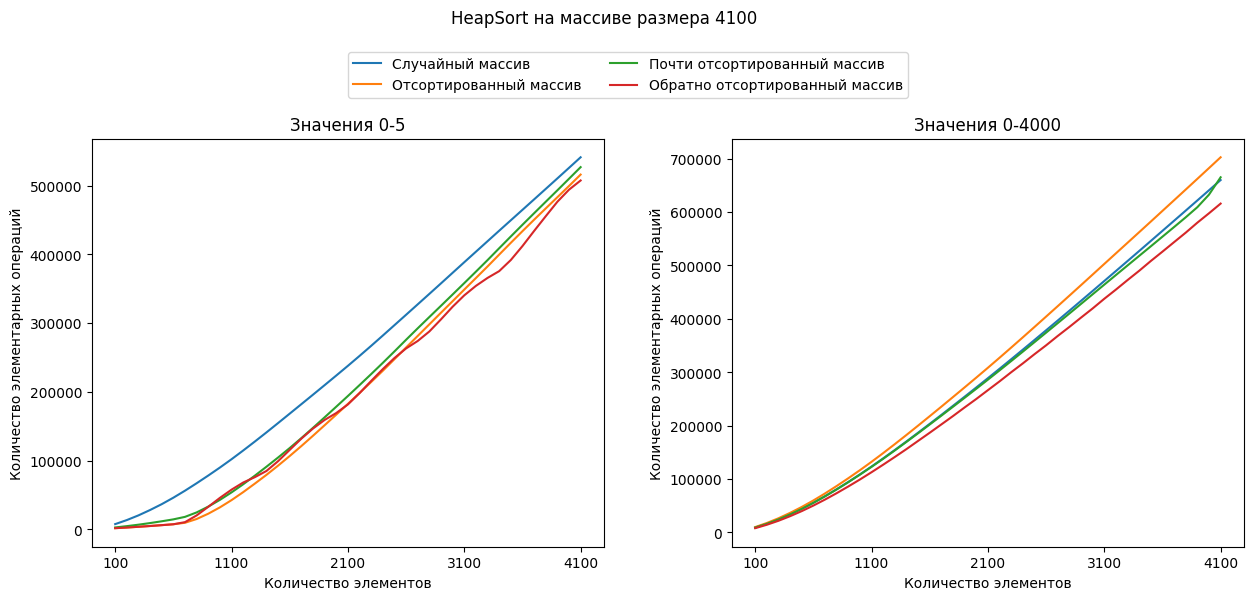

In [766]:
print_operations_plot_4100_size("HeapSort")

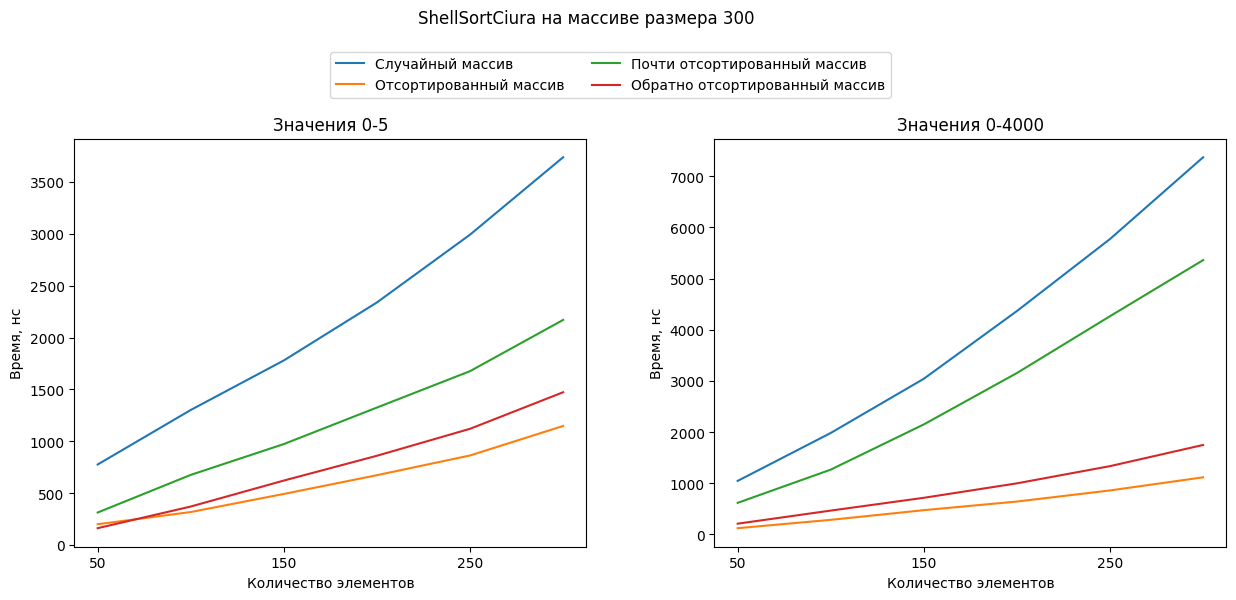

In [767]:
print_time_plot_300_size("ShellSortCiura")

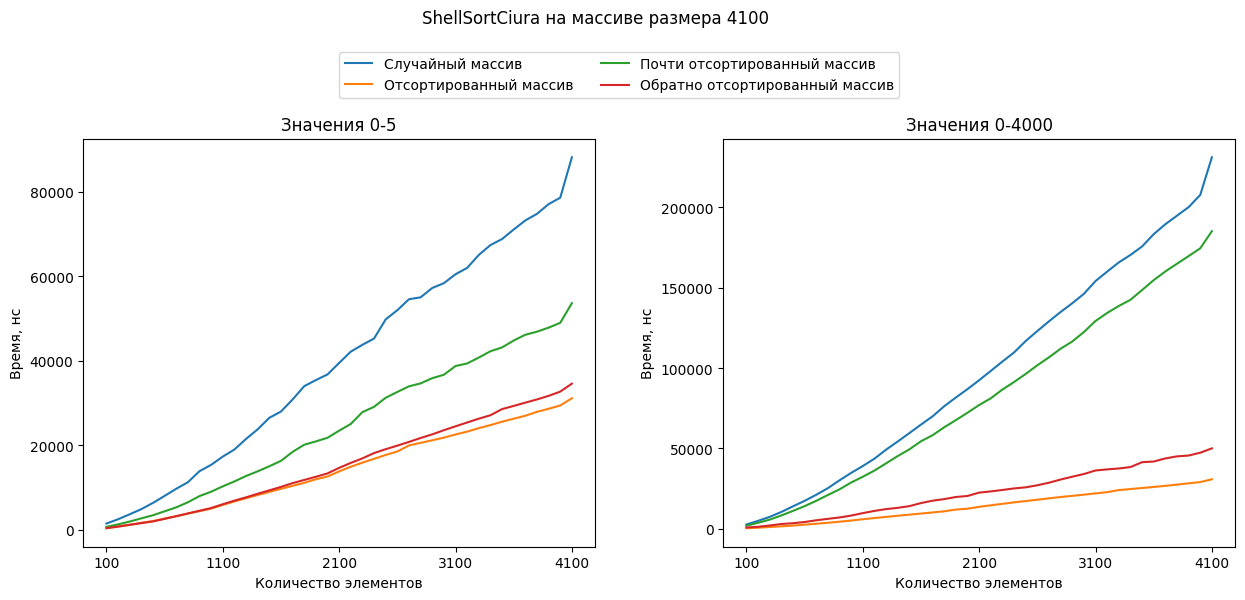

In [768]:
print_time_plot_4100_size("ShellSortCiura")

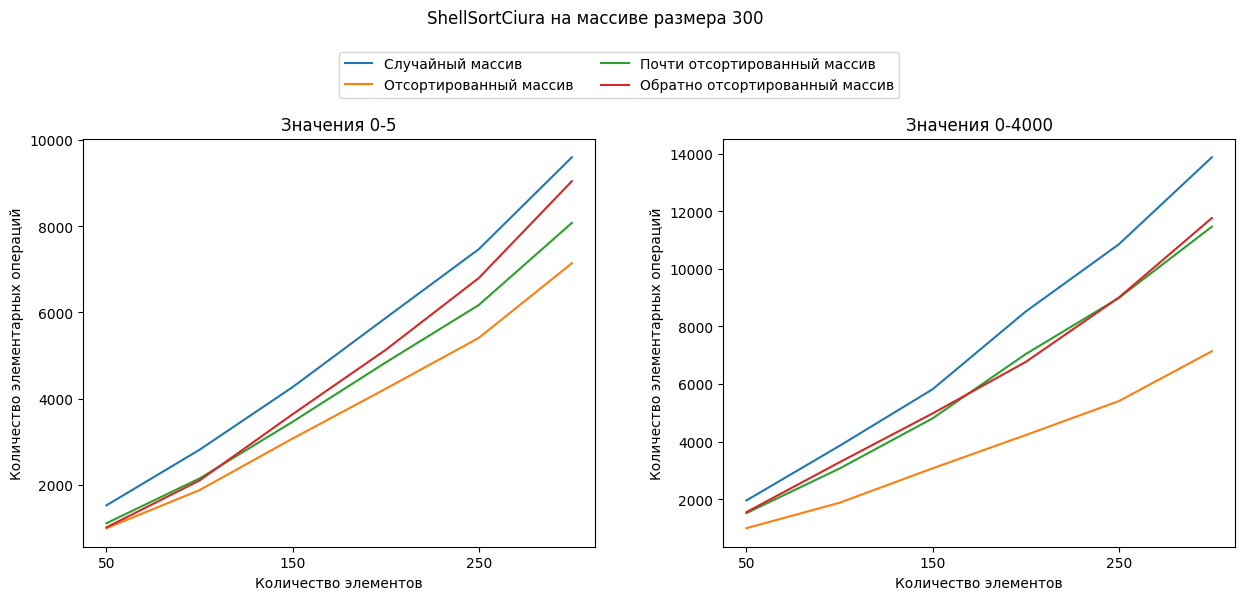

In [769]:
print_operations_plot_300_size("ShellSortCiura")

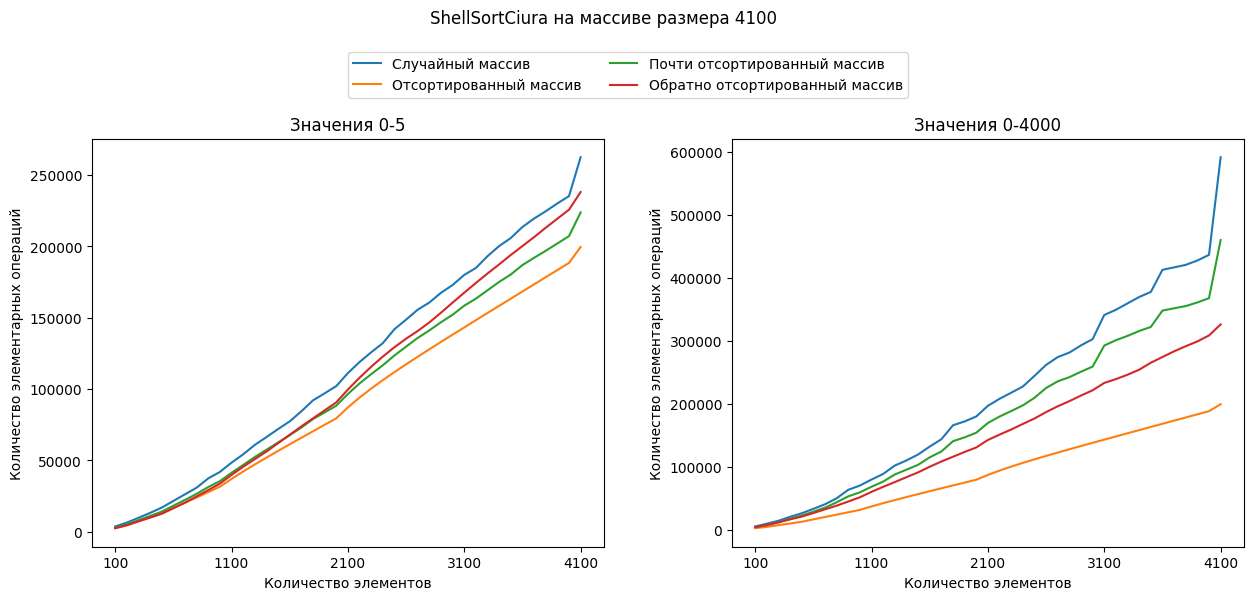

In [770]:
print_operations_plot_4100_size("ShellSortCiura")

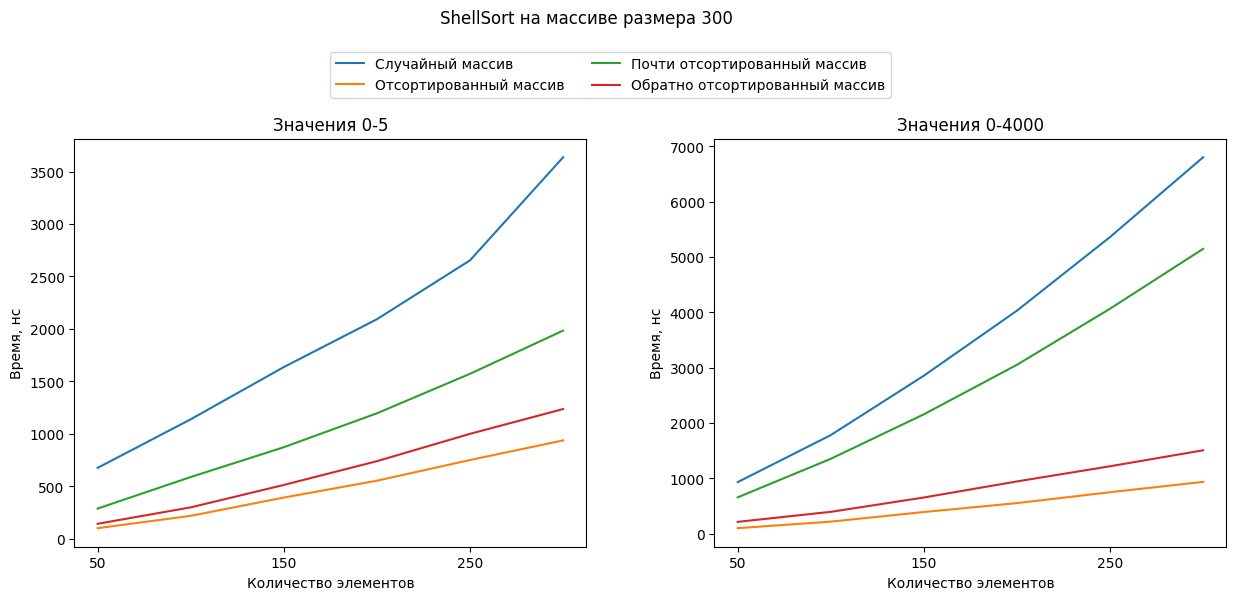

In [771]:
print_time_plot_300_size("ShellSort")

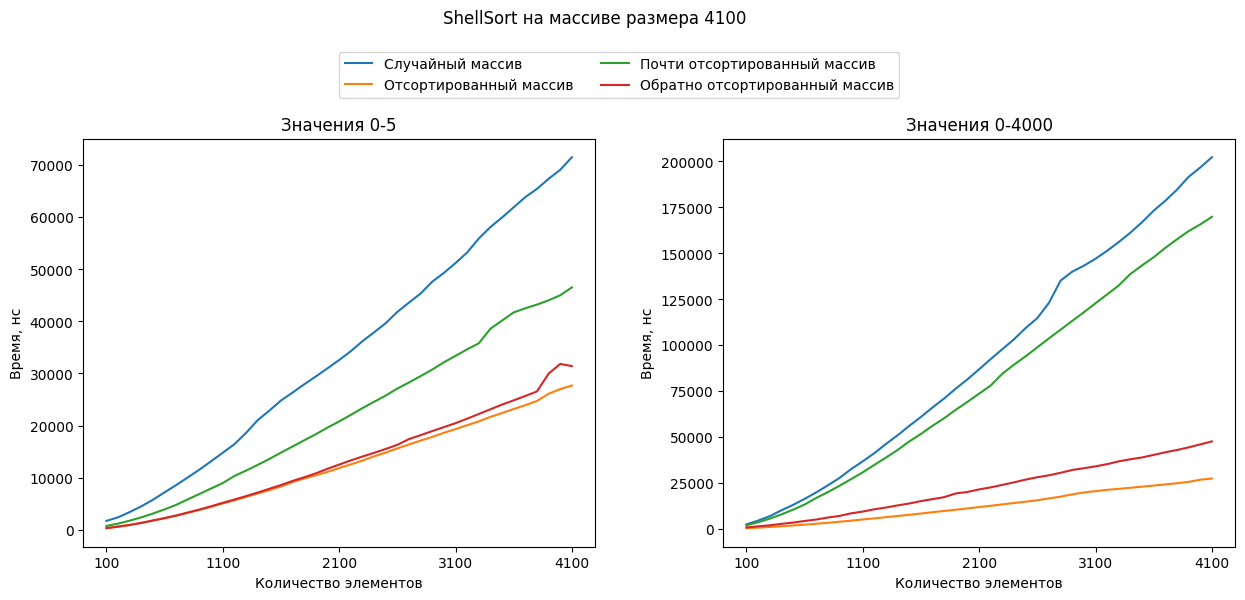

In [772]:
print_time_plot_4100_size("ShellSort")

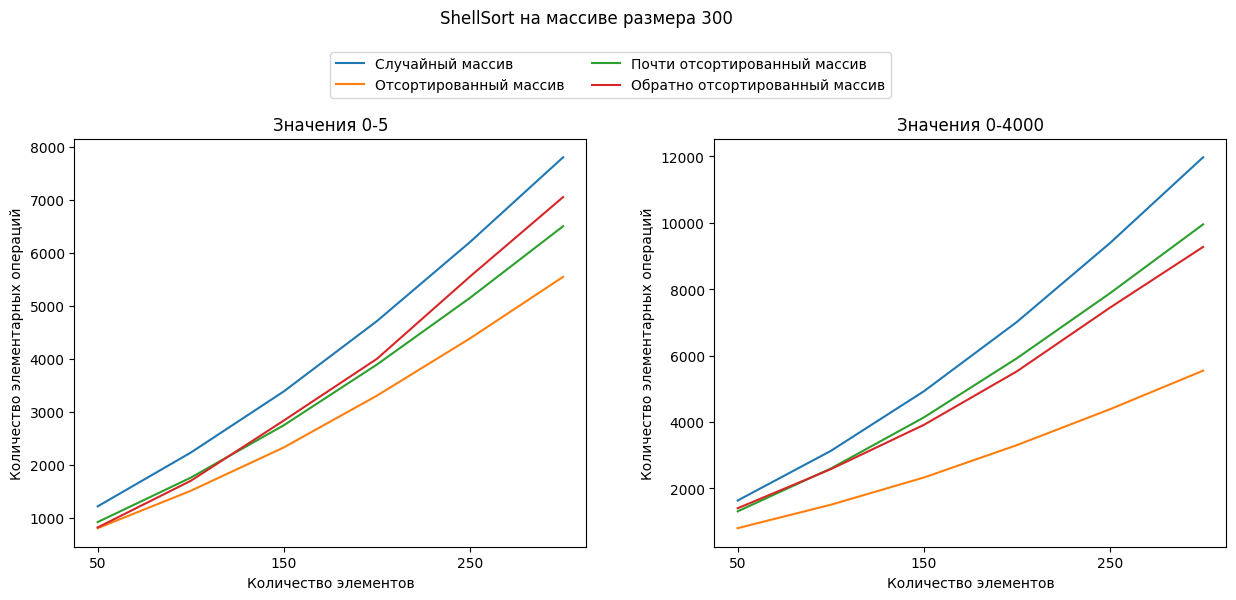

In [773]:
print_operations_plot_300_size("ShellSort")

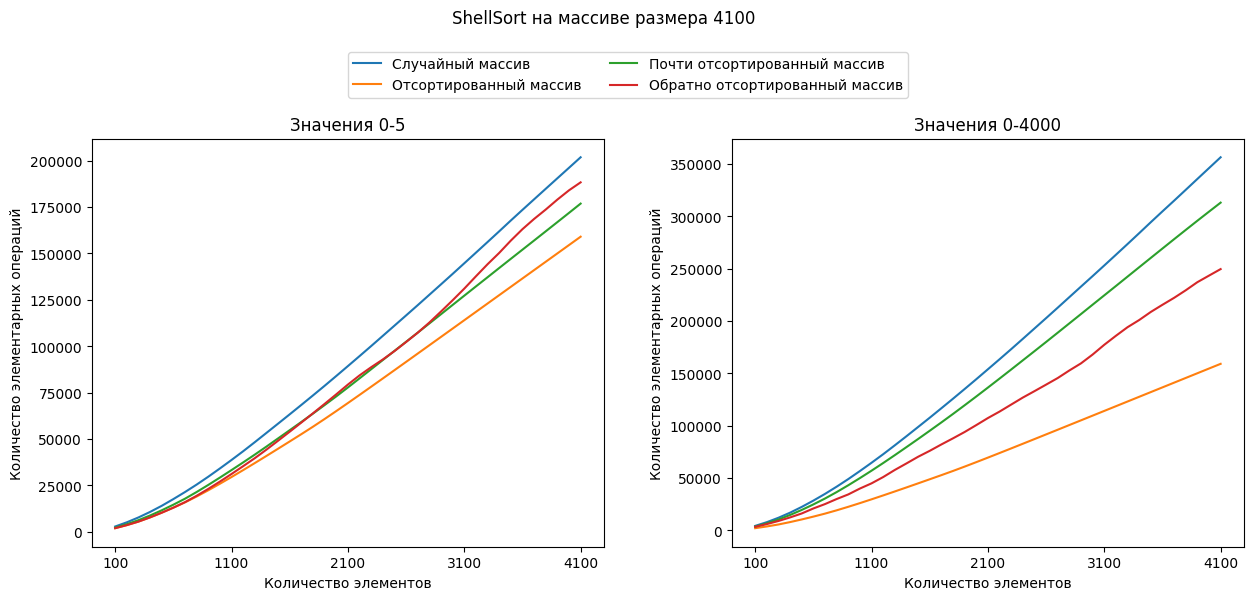

In [774]:
print_operations_plot_4100_size("ShellSort")

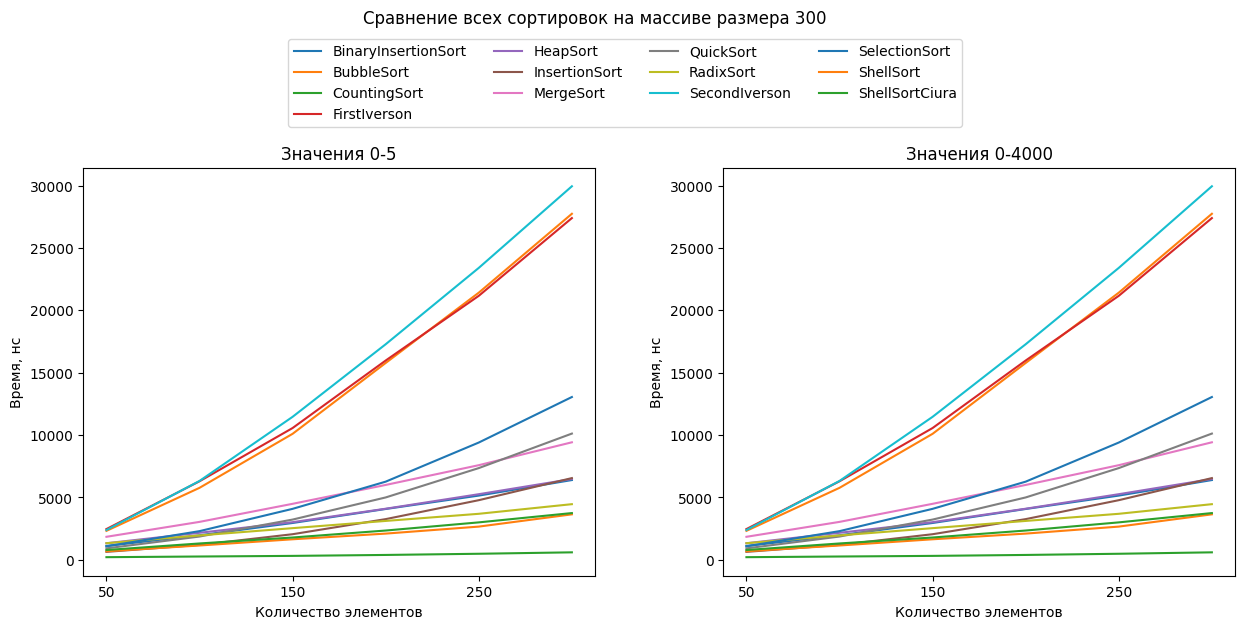

In [775]:
print_all_time_plots_300_size(0, 'Сравнение всех сортировок на массиве размера 300')

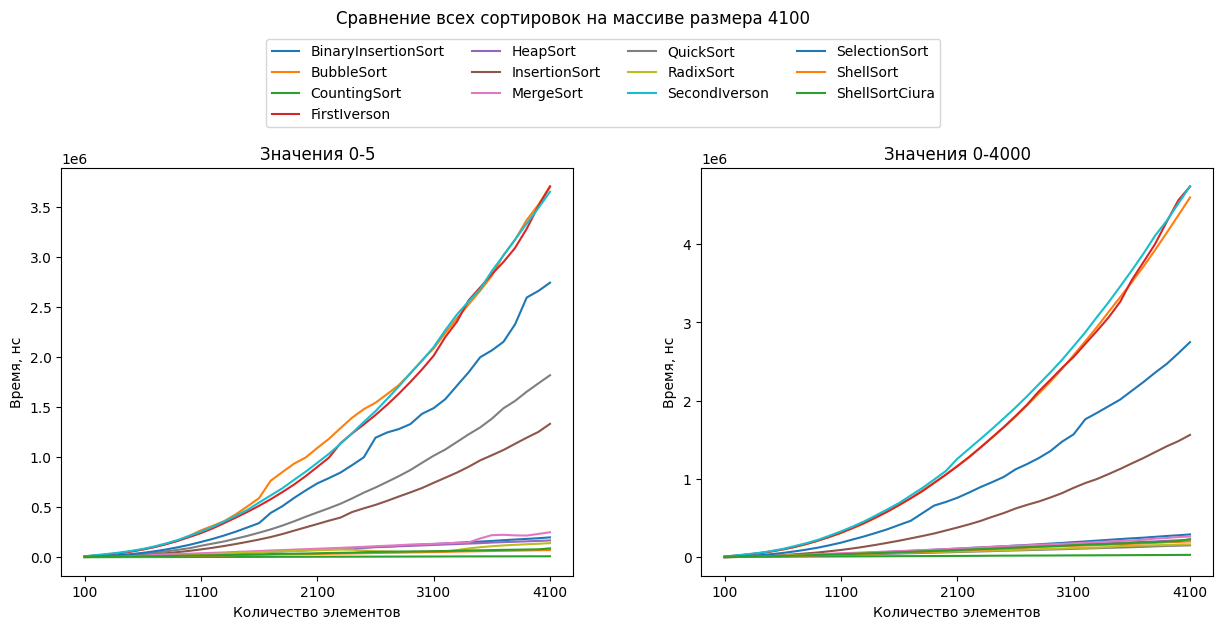

In [776]:
print_all_time_plots_4100_size(0, 'Сравнение всех сортировок на массиве размера 4100')

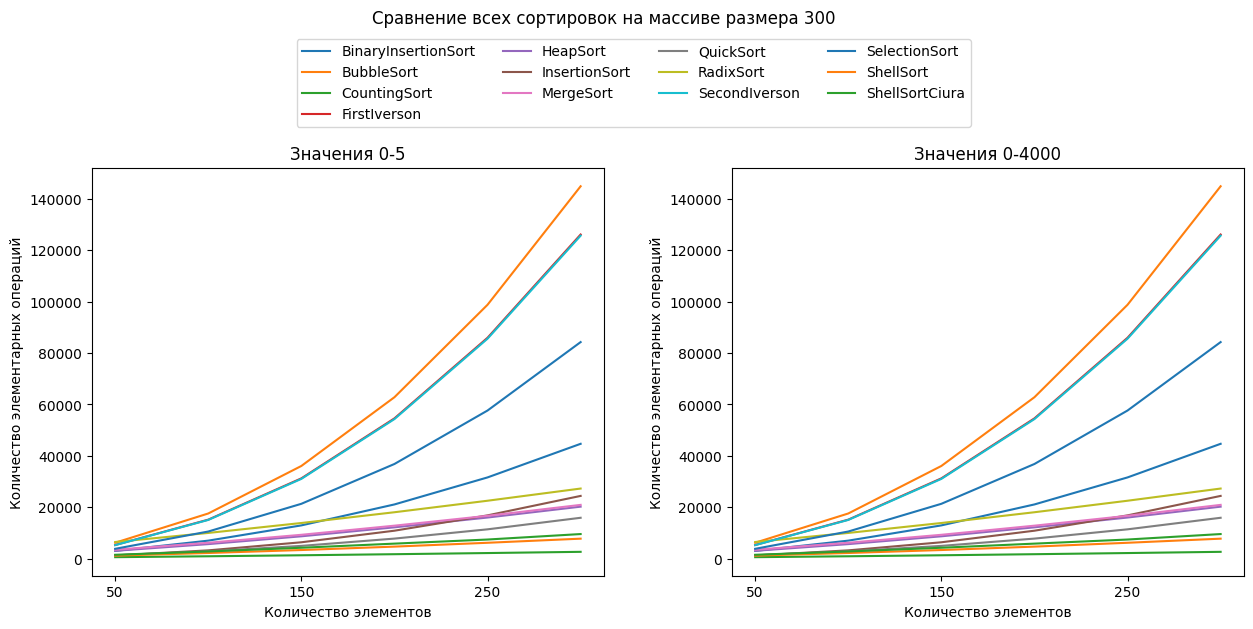

In [777]:
print_all_operations_plots_300_size(0, 'Сравнение всех сортировок на массиве размера 300')

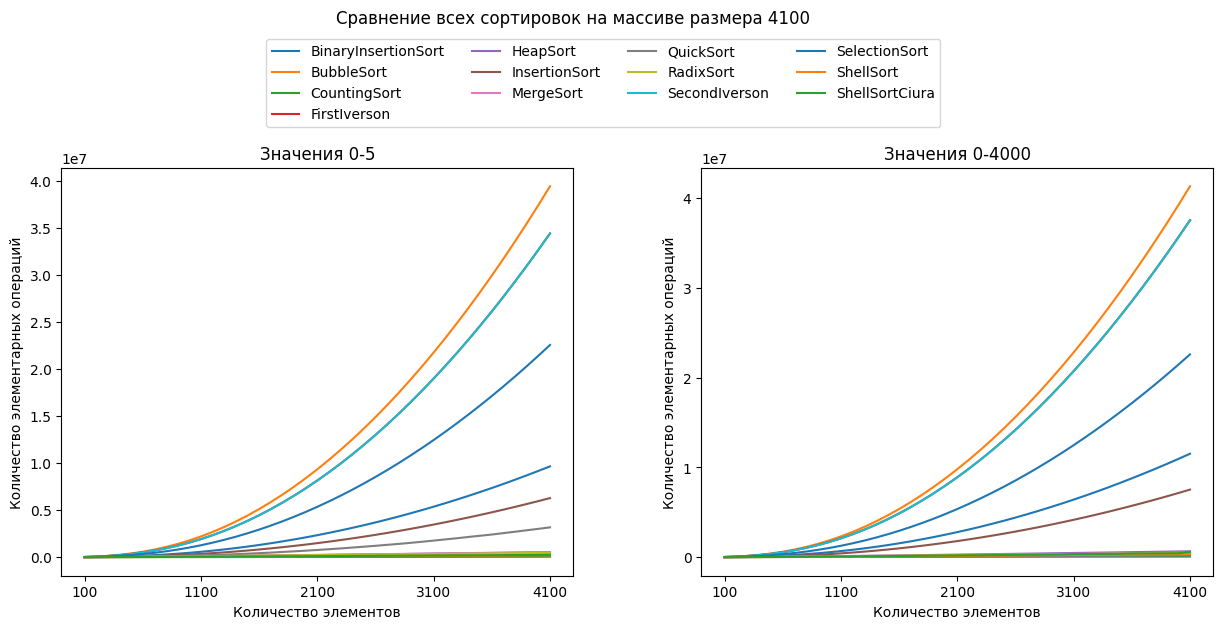

In [778]:
print_all_operations_plots_4100_size(0, 'Сравнение всех сортировок на массиве размера 4100')

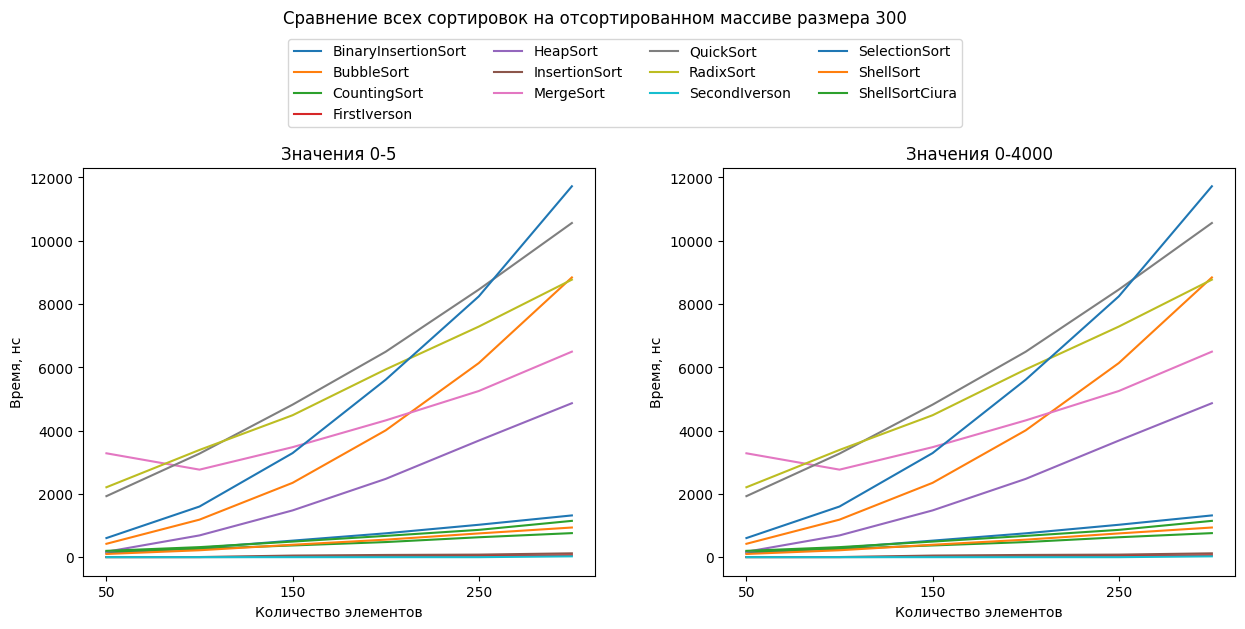

In [779]:
print_all_time_plots_300_size(1, 'Сравнение всех сортировок на отсортированном массиве размера 300')

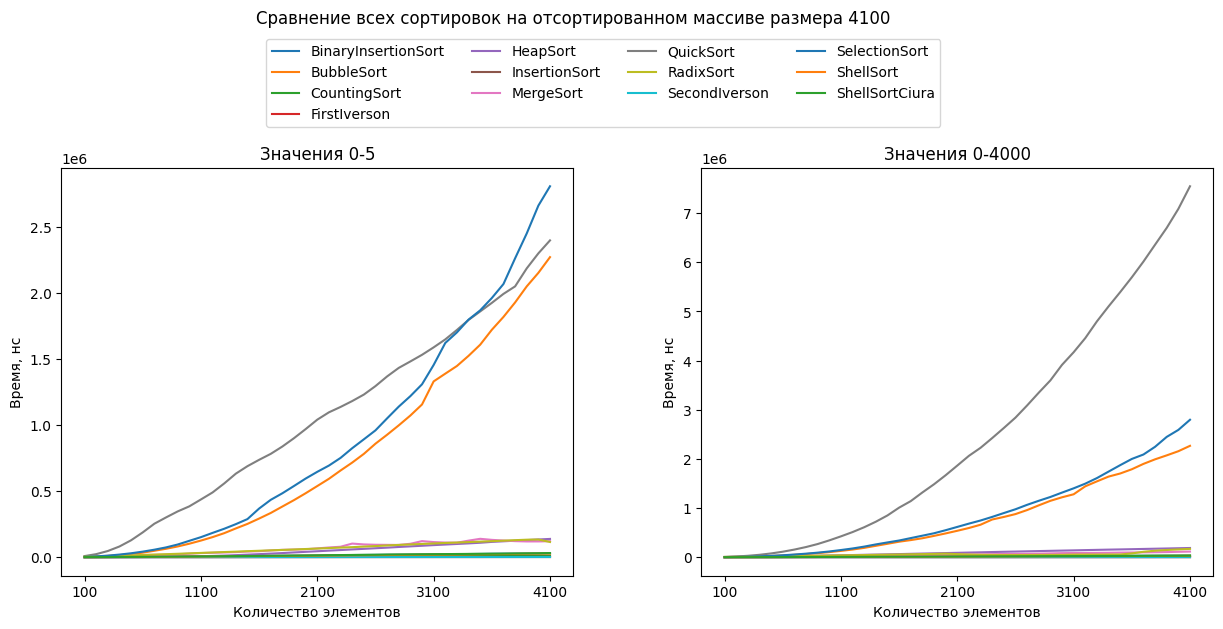

In [780]:
print_all_time_plots_4100_size(1, 'Сравнение всех сортировок на отсортированном массиве размера 4100')

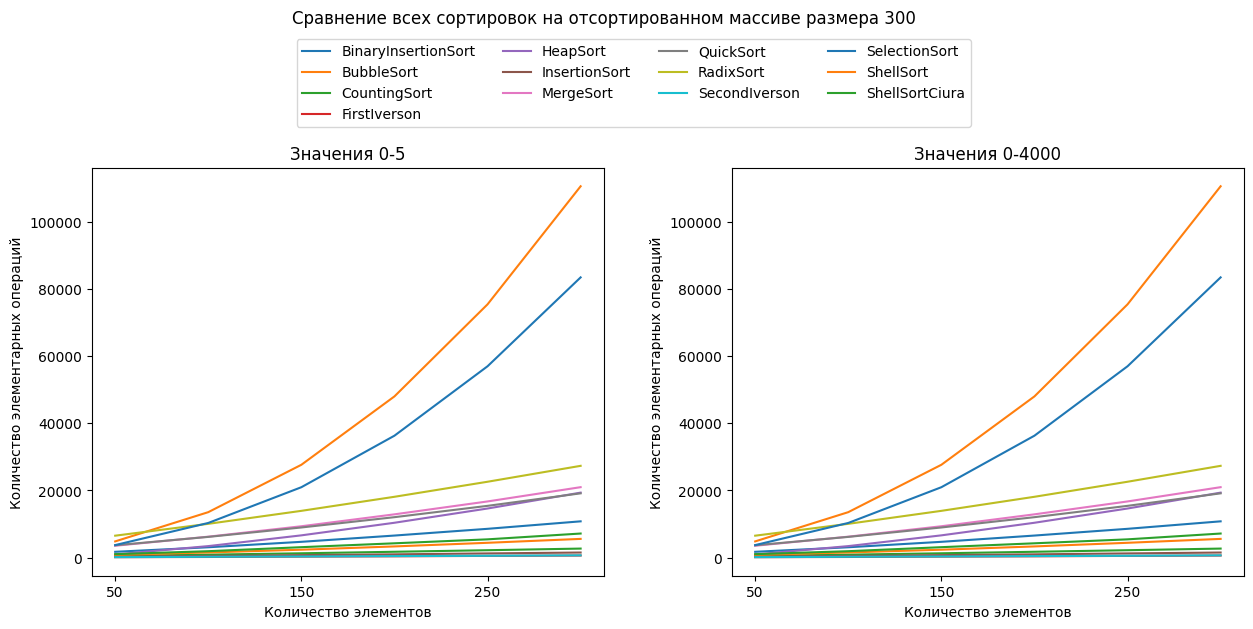

In [781]:
print_all_operations_plots_300_size(1, 'Сравнение всех сортировок на отсортированном массиве размера 300')

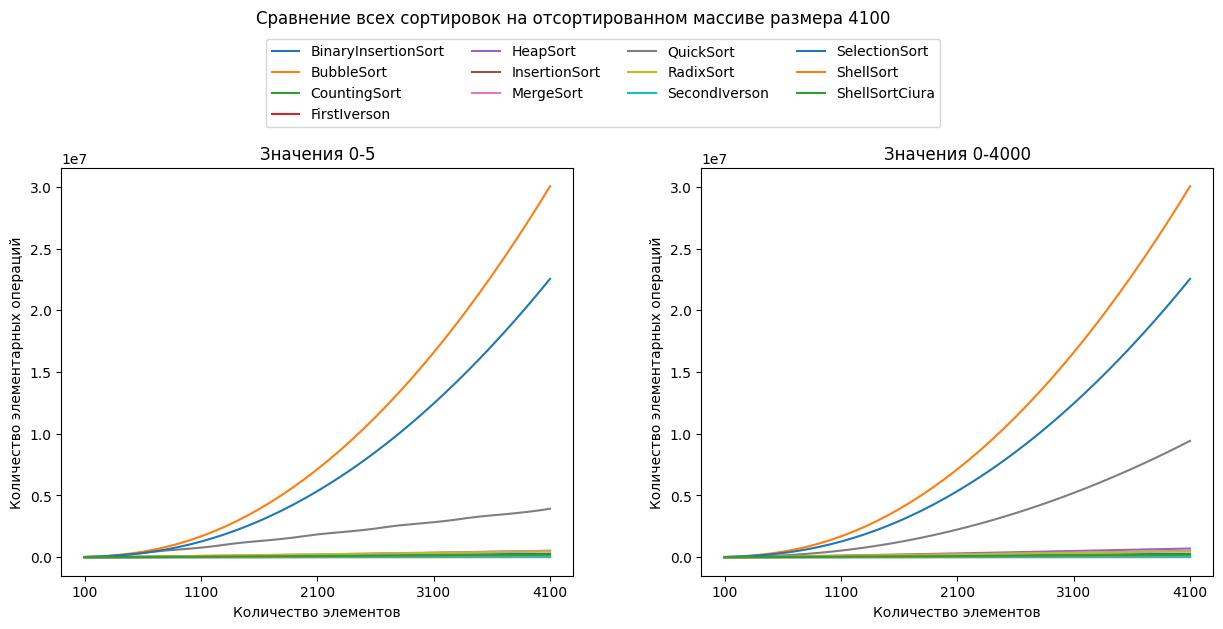

In [782]:
print_all_operations_plots_4100_size(1, 'Сравнение всех сортировок на отсортированном массиве размера 4100')

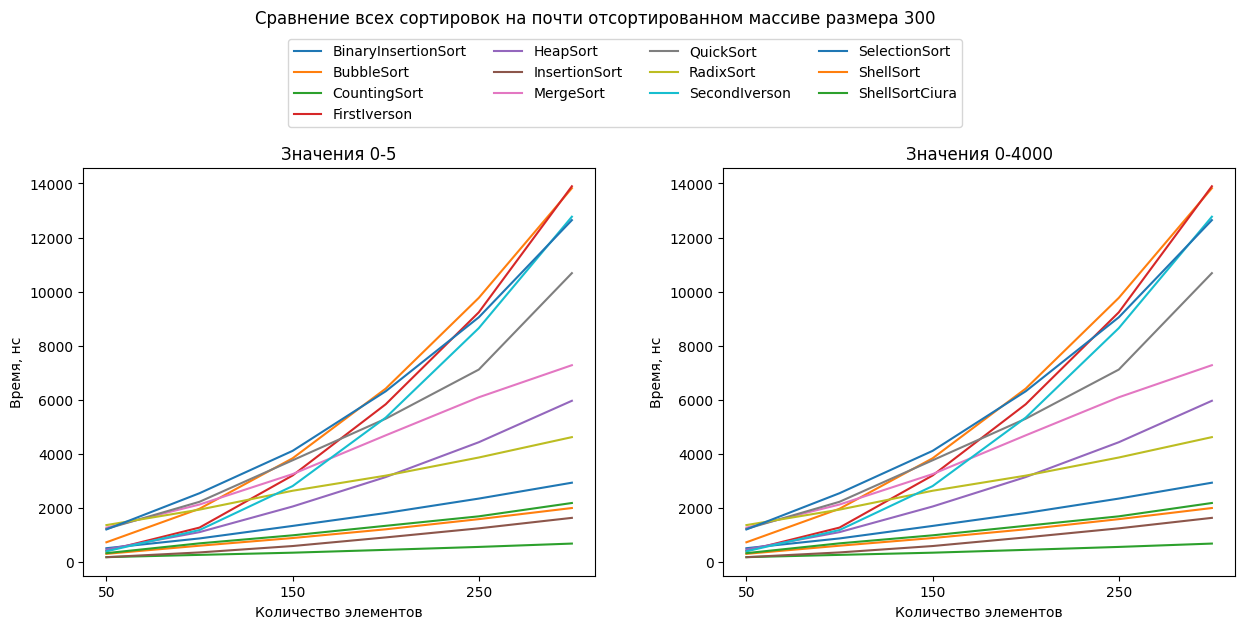

In [783]:
print_all_time_plots_300_size(2, 'Сравнение всех сортировок на почти отсортированном массиве размера 300')

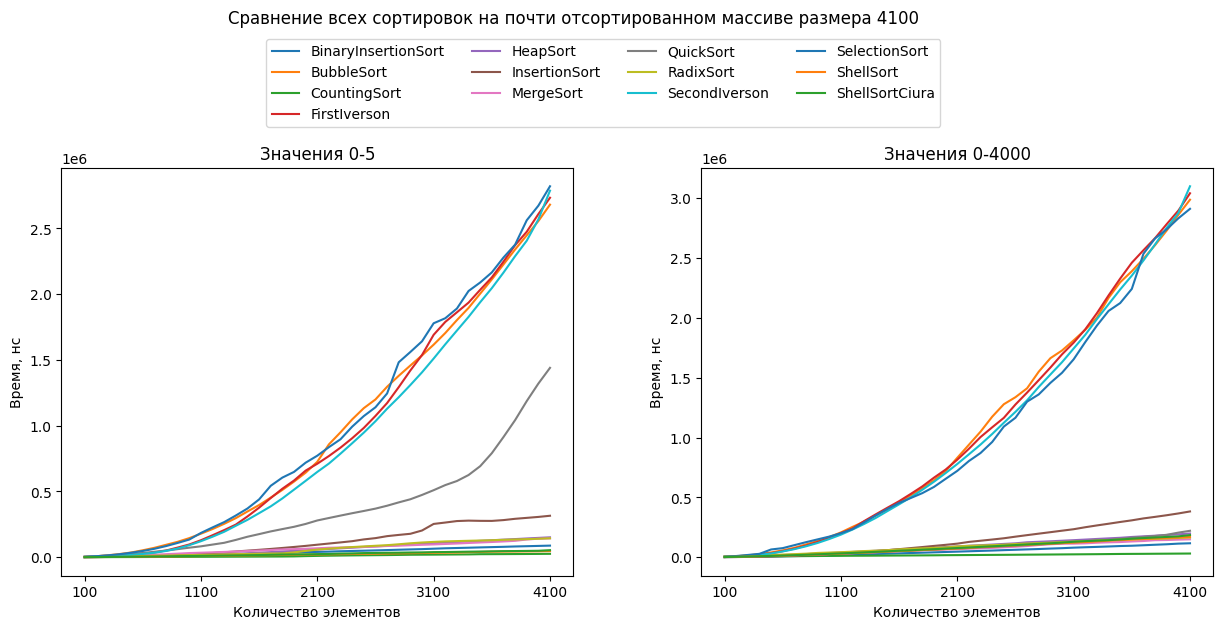

In [784]:
print_all_time_plots_4100_size(2, 'Сравнение всех сортировок на почти отсортированном массиве размера 4100')

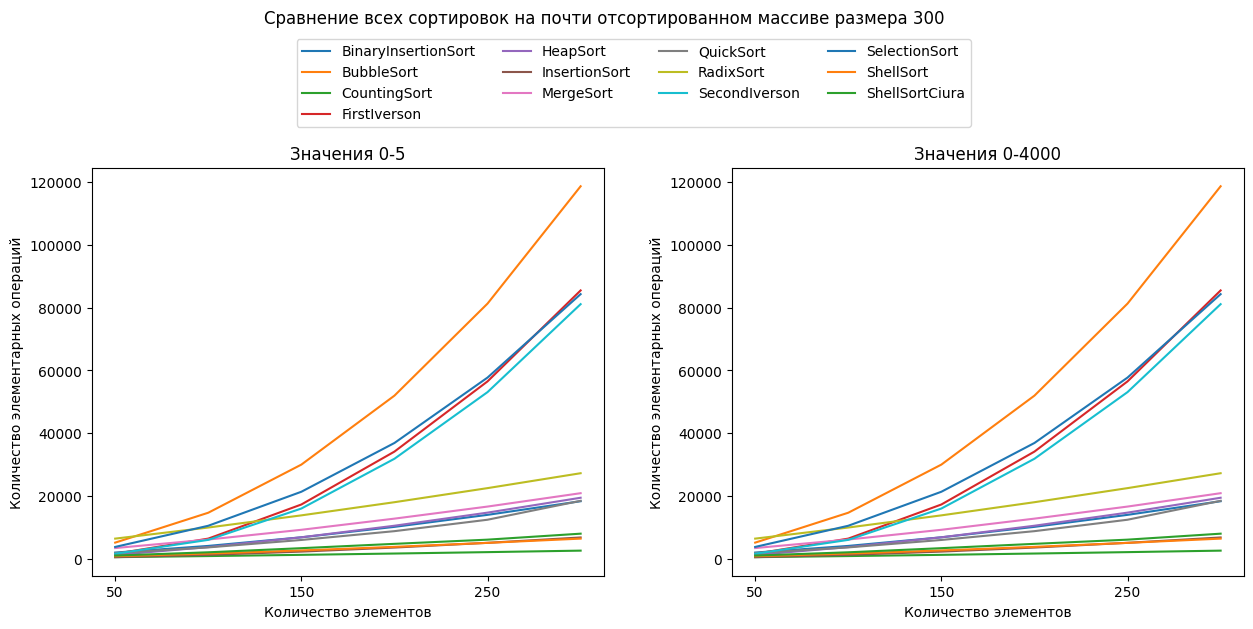

In [785]:
print_all_operations_plots_300_size(2, 'Сравнение всех сортировок на почти отсортированном массиве размера 300')

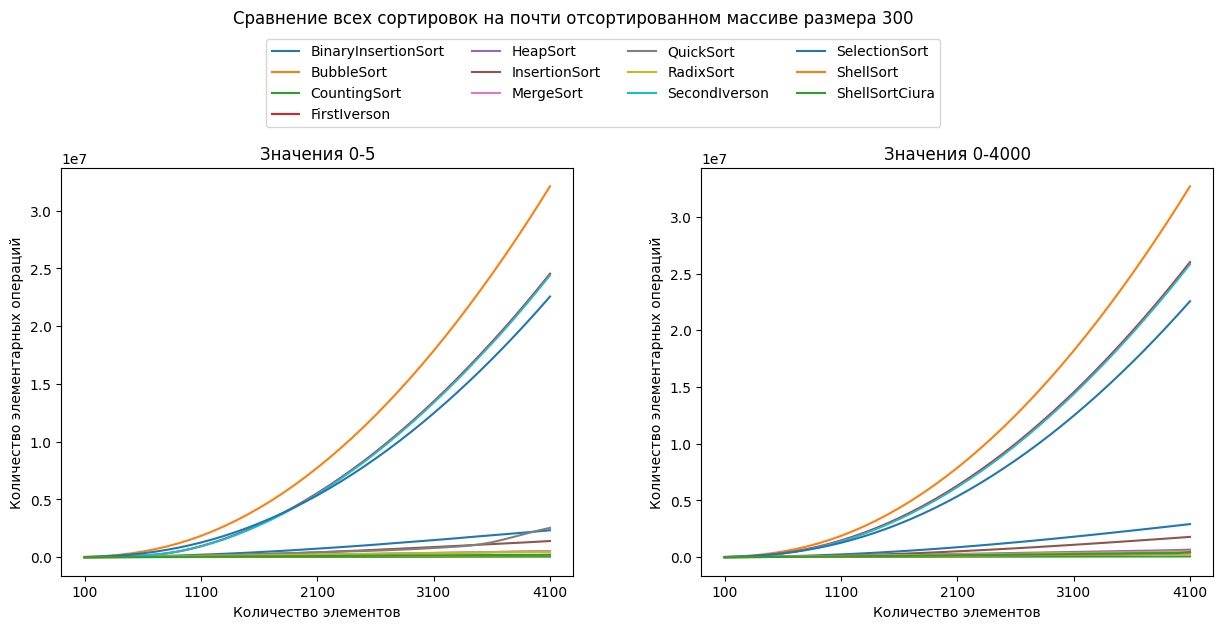

In [786]:
print_all_operations_plots_4100_size(2, 'Сравнение всех сортировок на почти отсортированном массиве размера 300')

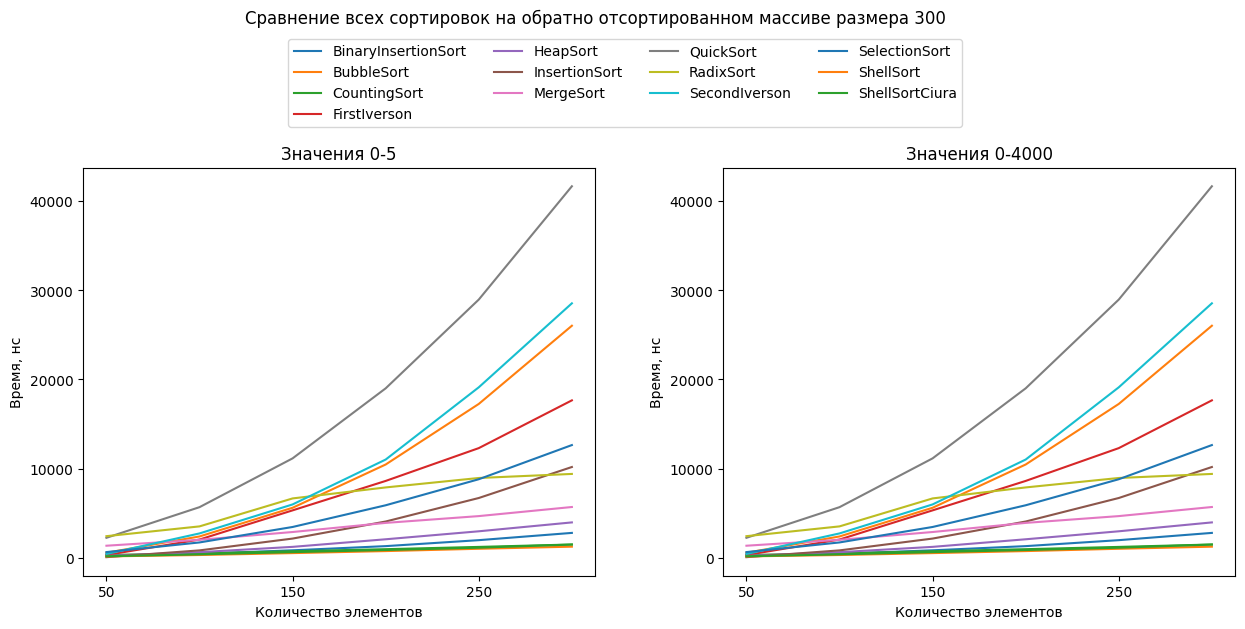

In [787]:
print_all_time_plots_300_size(3, 'Сравнение всех сортировок на обратно отсортированном массиве размера 300')

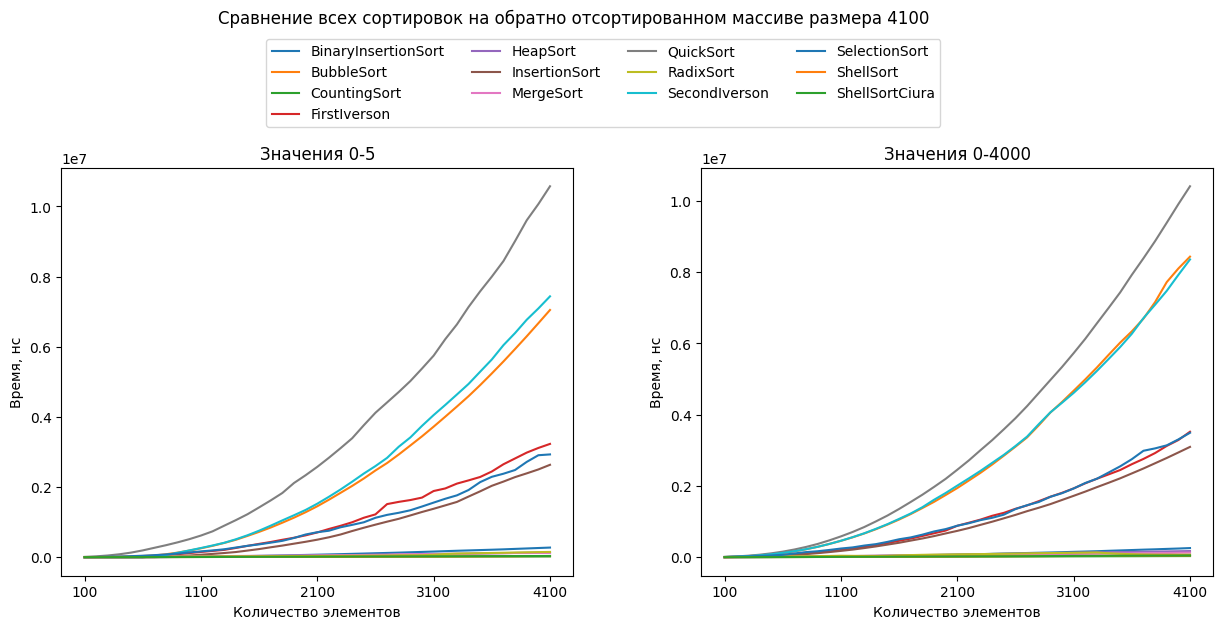

In [788]:
print_all_time_plots_4100_size(3, 'Сравнение всех сортировок на обратно отсортированном массиве размера 4100')

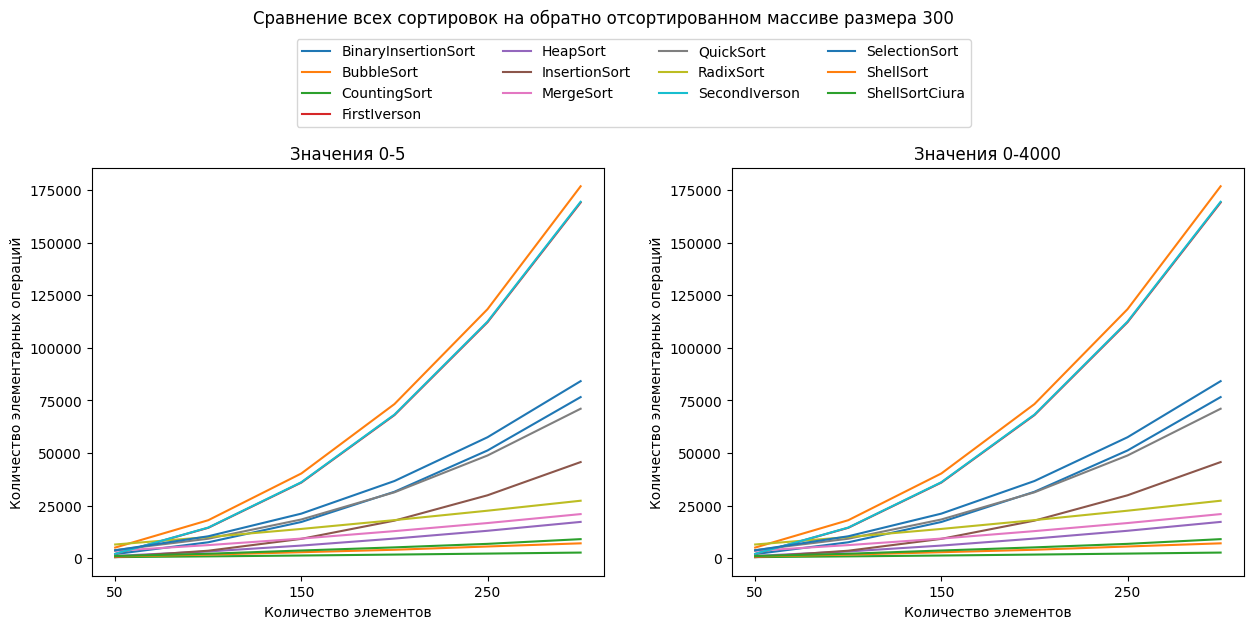

In [789]:
print_all_operations_plots_300_size(3, 'Сравнение всех сортировок на обратно отсортированном массиве размера 300')

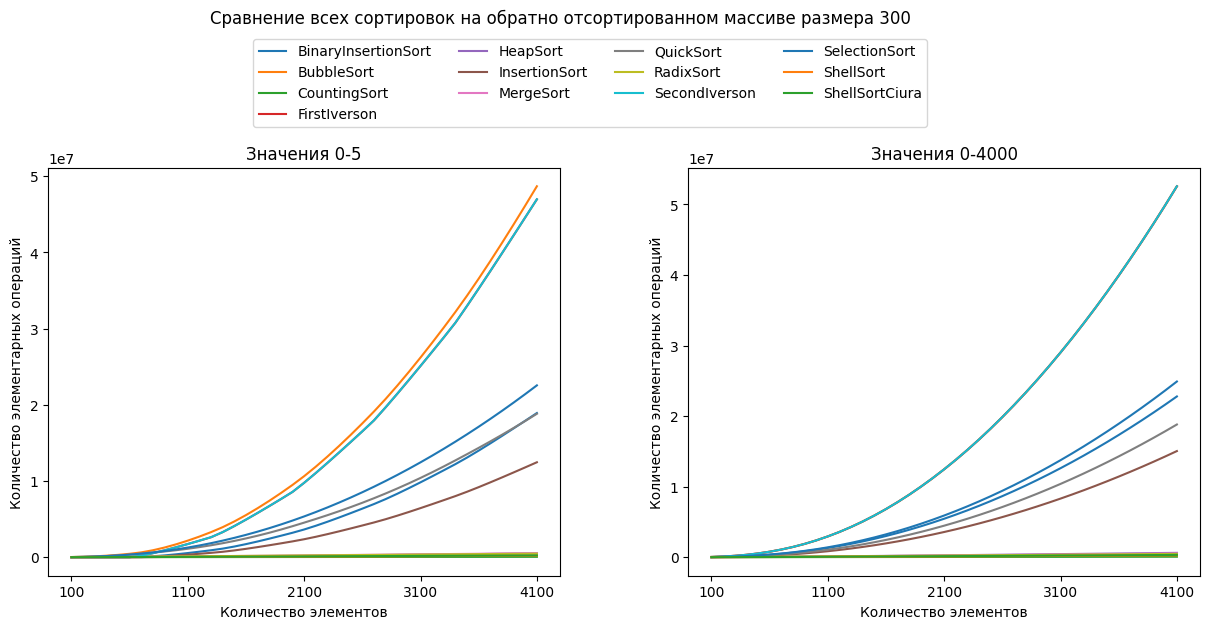

In [790]:
print_all_operations_plots_4100_size(3, 'Сравнение всех сортировок на обратно отсортированном массиве размера 300')